# OpenMASTER - quickstart

-------------------------

In [1]:
import pyomo.environ as pyo
import openMASTER

### Define the abstract model

In [2]:
m = openMASTER.make_model()
m

### Model data upload

* If you haven't created the .csv files, please:
    * Be aware the openMASTER_Data.xlsx file has to be downloaded using git-lfs or the following link:
        https://github.com/IIT-EnergySystemModels/openMASTER/raw/main/data/input/openMASTER_Data.xlsx?download=
    * Run the first line of code in this cell, which will both create the .csv files and load them into the DataPortal (this whole function takes several minutes)

* On the contrary, if you have already created the .csv files from the Excel file and haven't changed them, you can directly go on to the second line of code. This will save some minutes.

In any case, add "#" in front of the line you are not running.

In [3]:
data = openMASTER.load_dataportal_from_excel('../data/input/openMASTER_Data_2050_v1_STPathway.xlsx')
# data = openMASTER.load_dataportal_from_csv()

c:\Users\marios\Miniconda3\envs\openMaster_H2Included\lib\site-packages\openMASTER\loader.py:424: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  temp_values[sheetname].fillna(0.0, inplace = True)
c:\Users\marios\Miniconda3\envs\openMaster_H2Included\lib\site-packages\openMASTER\loader.py:424: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

### Create the instance of the abstract model 

In [4]:
instance = m.create_instance(data)
instance.dual = pyo.Suffix(direction=pyo.Suffix.IMPORT)


In [26]:
# Execute this if infeasible model is detected
# pyo.SolverFactory('gurobi_persistent')

### Solve the model instance

To solve the model instance, please select a solver within the Pyomo SolverFactory. Please note that any solver has to be previously installed.

In [5]:
solver = pyo.SolverFactory('gurobi')
solver.options['ResultFile'] = 'model.ilp'

# Setting the feasibility tolerance
solver.options['FeasibilityTol'] = 1e-6  # example value

# Setting the optimality tolerance (MIP gap)
# solver.options['MIPGap'] = 1e-5  # example value

solver_results = solver.solve(instance, keepfiles=False, tee=True)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-22
Read LP format model from file C:\Users\marios\AppData\Local\Temp\tmpianhyypz.pyomo.lp
Reading time = 9.30 seconds
x1: 3168206 rows, 2116851 columns, 9657209 nonzeros
Set parameter QCPDual to value 1
Gurobi Optimizer version 11.0.0 build v11.0.0rc2 (win64 - Windows 11+.0 (26100.2))

CPU model: Intel(R) Core(TM) i7-8700 CPU @ 3.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 6 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 3168206 rows, 2116851 columns and 9657209 nonzeros
Model fingerprint: 0xd7eafcdf
Coefficient statistics:
  Matrix range     [3e-06, 5e+09]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [5e-05, 3e+05]
         Consider reformulating model or setting NumericFocus parameter
         to avoid numerical issues.
Presolve removed 2830502 rows and 1713341 columns
Presolve time: 4.52s
Presolved: 337704 ro

### **Results**

Extract information on variables through the model output to .csv files

In [6]:
import pyomo.contrib.iis
pyo.SolverFactory('gurobi_persistent')
pyomo.contrib.iis.write_iis(instance, "Infeasibilities.ilp", solver='gurobi')

RuntimeError: The Pyomo persistent interface to gurobi could not be found.

In [7]:
path        = "../data/input/openMASTER_Data_2050_v1_Truck.xlsx"   #########RECORDAR CAMBIAR EL NOMBRE######
output_path = "../data/tmp/output"
sheetname   = "Output"

d_vars_from_instance = openMASTER.export_model_to_csv(path, output_path, sheetname, instance)

Loading variable information from .csv to a dictionary containing all outputs

In [17]:
d_vars = openMASTER.import_results_from_csv(output_path)

In [22]:
# Lets make a dictionart with the dual values
# I want to access the dictionary in the following way duals_EQ_TEBalance[year][season][day]
# the results have to show a table for all technologies in rows and hours of the day in columns
# In this way I can easily access the dual values for all technology in the model for all hours of an specific year, season and day

duals_EQ_TEBalance = {}

for i in instance.sYear:
    duals_EQ_TEBalance[sYear] = {}
    for j in instance.sSeason:
        duals_EQ_TEBalance[sYear][sSeason] = {}
        for k in instance.sDay:
            duals_EQ_TEBalance[sYear][sSeason][sDay] = {}
            for l in instance.sHour:
                duals_EQ_TEBalance[sYear][sSeason][sDay][sHour] = {}
                for m in instance.sCEPri:
                    duals_EQ_TEBalance[sYear][sSeason][sDay][sHour][sTE] = instance.dual[instance.EQ_CEPriBalance[m,i,j,k,l]]


# Now build a dataframe with the dual values duals_EQ_TEBalance['y2020']['R']['d01'] for example with the dual values for all technologies in rows and hours of the day in columns

NameError: name 'sYear' is not defined

In [23]:
duals_EQ_TEBalance_sec = {}

for i in instance.sYear:
    duals_EQ_TEBalance_sec[sYear] = {}
    for j in instance.sSeason:
        duals_EQ_TEBalance_sec[sYear][sSeason] = {}
        for k in instance.sDay:
            duals_EQ_TEBalance_sec[sYear][sSeason][sDay] = {}
            for l in instance.sHour:
                duals_EQ_TEBalance_sec[sYear][sSeason][sDay][sHour] = {}
                for m in instance.sCESec:
                    duals_EQ_TEBalance_sec[sYear][sSeason][sDay][sHour][sTE] = instance.dual[instance.EQ_CESecBalance[m,i,j,k,l]]

NameError: name 'sYear' is not defined

In [18]:
import pandas as pd
import numpy as np

df_1 = pd.DataFrame(duals_EQ_TEBalance['y2025']['R']['d01']).drop(['sCEBIODIEPP','sCEBIOETHPP','sCEREFINLOWC','sCEREFINHIGC','sCEREFINVHIC','sCEREGASIF','sPE2TE_IMCO','sPE2TE_NAGAS','sPE2TE_BIOMA','sCESOPHVDIWOTIND','sCESOPHVDIWOTOTH','sCESOLTHDIIND','sCESOLTHDIOTH'])
df_2 = pd.DataFrame(duals_EQ_TEBalance['y2025']['S']['d01']).drop(['sCEBIODIEPP','sCEBIOETHPP','sCEREFINLOWC','sCEREFINHIGC','sCEREFINVHIC','sCEREGASIF','sPE2TE_IMCO','sPE2TE_NAGAS','sPE2TE_BIOMA','sCESOPHVDIWOTIND','sCESOPHVDIWOTOTH','sCESOLTHDIIND','sCESOLTHDIOTH'])
df_3 = pd.DataFrame(duals_EQ_TEBalance['y2025']['F']['d01']).drop(['sCEBIODIEPP','sCEBIOETHPP','sCEREFINLOWC','sCEREFINHIGC','sCEREFINVHIC','sCEREGASIF','sPE2TE_IMCO','sPE2TE_NAGAS','sPE2TE_BIOMA','sCESOPHVDIWOTIND','sCESOPHVDIWOTOTH','sCESOLTHDIIND','sCESOLTHDIOTH'])
df_4 = pd.DataFrame(duals_EQ_TEBalance['y2025']['W']['d01']).drop(['sCEBIODIEPP','sCEBIOETHPP','sCEREFINLOWC','sCEREFINHIGC','sCEREFINVHIC','sCEREGASIF','sPE2TE_IMCO','sPE2TE_NAGAS','sPE2TE_BIOMA','sCESOPHVDIWOTIND','sCESOPHVDIWOTOTH','sCESOLTHDIIND','sCESOLTHDIOTH'])

df1_sec = pd.DataFrame(duals_EQ_TEBalance_sec['y2020']['R']['d01']).iloc[0:4,:]

# Graph the results in a temporal line. In the x axis first put the values of hours of the df_1, then the values of df_2, then df_3 and finally df_4
# The y axis should be the dual values
# The graph should have as plots as technologies in the model (rows of the dfs)

import matplotlib.pyplot as plt

#plt.plot(df_1.T)

# Change the colors for different technologies
colors = plt.cm.viridis(np.linspace(0, 1, len(df_1.index)))
for i, color in enumerate(colors):
    plt.plot(df_1.T.index, df_1.T.iloc[:,i]*1000, color=color)
    # plt.plot(df1_sec.T*1000)  


#plt.legend(df_1.index)
plt.legend(df_1.index)
# Take the legend out of the plot
plt.legend(df_1.index, bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.legend(df1_sec.index, bbox_to_anchor=(1.05, 1), loc='upper left')   
plt.ylabel('Dual values [€/kWh]')
# Rotate the x axis labels
plt.xticks(rotation=90)
plt.xlabel('Hours of the day')
plt.title('Dual values for each sCEPri technology in the model for year 2020, season R and day 01')
plt.grid()
plt.show()


KeyError: 'y2025'

In [12]:
# lets calculate the mean of each row of df_1

df_4.mean(axis=1)*1000


NameError: name 'df_4' is not defined

In [19]:
plt.plot(df1_sec.T*1000)  
plt.legend(df1_sec.index)  
plt.legend(df1_sec.index, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Dual values [€/kWh]')
plt.xticks(rotation=90)
plt.xlabel('Hours of the day')
plt.title('Dual values for each sCESec technology in the model for year 2020, season R and day 01')
plt.grid()


NameError: name 'plt' is not defined

In [24]:
# Lets make a dictionart with the dual values
# I want to access the dictionary in the following way duals[year][season][day]
# the results have to show a table for all technologies in rows and hours of the day in columns
# In this way I can easily access the dual values for all technology in the model for all hours of an specific year, season and day

duals_EQ_TEBalance = {}
for m in instance.sTE:
    duals_EQ_TEBalance[m] = {}
    for i in instance.sYear:
        duals_EQ_TEBalance[m][i] = {}
        for j in instance.sSeason:
            duals_EQ_TEBalance[m][i][j] = {}
            for k in instance.sDay:
                duals_EQ_TEBalance[m][i][j][k] = {}
                for l in instance.sHour:
                    duals_EQ_TEBalance[m][i][j][k][l] = instance.dual[instance.EQ_TEBalance[m,i,j,k,l]]
                    

import csv

# Assuming duals_EQ_TEBalance is populated as per your code above

# Open a new CSV file to write into
with open('../data/tmp/output/duals_EQ_TEBalance.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    
    # Write the header of the CSV file
    writer.writerow(['sTE', 'sYear', 'sSeason', 'sDay', 'sHour', 'dual_value'])
    
    # Iterate through each level of the dictionary to write rows
    for m in duals_EQ_TEBalance:
        for i in duals_EQ_TEBalance[m]:
            for j in duals_EQ_TEBalance[m][i]:
                for k in duals_EQ_TEBalance[m][i][j]:
                    for l in duals_EQ_TEBalance[m][i][j][k]:
                        # Retrieve the dual value for the current combination of indices
                        dual_value = duals_EQ_TEBalance[m][i][j][k][l]
                        # Write the current row to the CSV file
                        writer.writerow([m, i, j, k, l, dual_value])


# Convert duals['sTEELECE']['y2020']['R']['d01'] to a dataframe with the dual values for all hours of the day

#Lets calculate the consumption
# consumption = {}
# for m in instance.sTE:
#     consumption[m] = {}
#     for i in instance.sST:
#         consumption[m][i] = {}
#         for j in instance.sES:
#             consumption[m][i][j] = {}
#             for k in instance.sVin:
#                 consumption[m][i][j][k] = {}
#                 for l in instance.sYear:
#                     consumption[m][i][j][k][l] = {}
#                     for n in instance.sSeason:
#                         consumption[m][i][j][k][l][n] = {}
#                         for o in instance.sDay:
#                             consumption[m][i][j][k][l][n][o] = {}
#                             for p in instance.sHour:
#                                 consumption[m][i][j][k][l][n][o][p] = instance.vQSTInTE[m,i,j,k,l,n,o,p].value for [m,i,j] in instance.sQTESTES_Ele

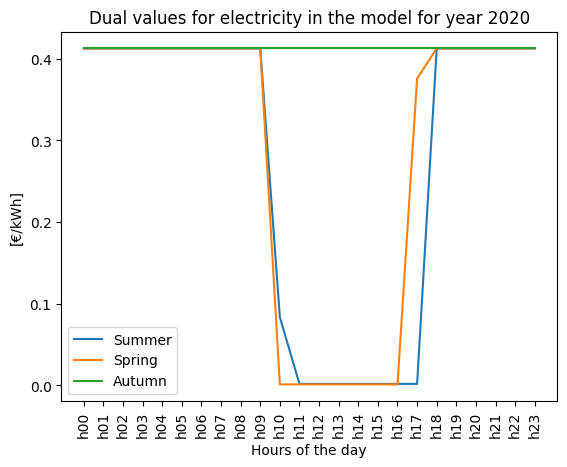

In [25]:
import pandas as pd

df_summer = pd.DataFrame.from_dict(duals_EQ_TEBalance['sTEELECE']['y2020']['R']['d01'], orient='index', columns=['Value'])*1000
df_spring = pd.DataFrame.from_dict(duals_EQ_TEBalance['sTEELECE']['y2020']['S']['d01'], orient='index', columns=['Value'])*1000
df_autumn = pd.DataFrame.from_dict(duals_EQ_TEBalance['sTEELECE']['y2020']['F']['d01'], orient='index', columns=['Value'])*1000
df_winter = pd.DataFrame.from_dict(duals_EQ_TEBalance['sTEELECE']['y2020']['W']['d01'], orient='index', columns=['Value'])*1000

# Graph the results in a temporal line. In the x axis first put the values of hours of the df_1, then the values of df_2, then df_3 and finally df_4
# The y axis should be the dual values
# The graph should have as plots as technologies in the model (rows of the dfs)

import matplotlib.pyplot as plt

plt.plot(df_summer)
plt.plot(df_spring)
plt.plot(df_autumn)
# plt.plot(df_winter)

# rotate the x axis labels
plt.xticks(rotation=90)
plt.ylabel('[€/kWh]')
plt.xlabel('Hours of the day')
plt.title('Dual values for electricity in the model for year 2020')
plt.legend(['Summer', 'Spring', 'Autumn', 'Winter'])






In [26]:
df_1 = pd.DataFrame(duals_EQ_TEBalance['y2020']['R']['d01'])
df_2 = pd.DataFrame(duals_EQ_TEBalance['y2020']['S']['d01'])
df_3 = pd.DataFrame(duals_EQ_TEBalance['y2020']['F']['d01'])
# df_4 = pd.DataFrame(duals_EQ_TEBalance['y2020']['W']['d01'])

# preserve only the values for the rows DIFFERENT to sTEH2
#df_4 = df_4.drop(['sTEH2','sTEELEDIIND'])

#PRESERVE ONLY sTEELECE in df_1
df_1 = df_1.iloc[0:1,:]*1000
df_2 = df_2.iloc[0:1,:]*1000
df_3 = df_3.iloc[0:1,:]*1000
# df_4 = df_4.iloc[0:1,:]*1000

# State the mean value for the whole year duals_EQ_TEBalance = df_1.mean(axis=0)

df_1_mean = df_1.mean(axis=1)
df_2_mean = df_2.mean(axis=1)
df_3_mean = df_3.mean(axis=1)
# df_4_mean = df_4.mean(axis=1)

# Considering that each df corresponds to a season of the year, establish the mean value for the whole year
df_mean = pd.concat([df_1_mean,df_2_mean,df_3_mean],axis=1)

# Graph the results in a temporal line. In the x axis first put the values of hours of the df_1, then the values of df_2, then df_3 and finally df_4
# The y axis should be the dual values
# The graph should have as plots as technologies in the model (rows of the dfs)

import matplotlib.pyplot as plt

#plt.plot(df_1.T)

# Change the colors for different technologies
colors = plt.cm.viridis(np.linspace(0, 1, len(df_1.index)))
for i, color in enumerate(colors):
    plt.plot(df_1.T.index, df_1.T.iloc[:,i], color='red')
    plt.plot(df_2.T.index, df_2.T.iloc[:,i], color='lightblue')
    plt.plot(df_3.T.index, df_3.T.iloc[:,i], color='blue')
    # plt.plot(df_4.T.index, df_4.T.iloc[:,i], color='orange')


plt.legend(['Summer','Spring','Fall'])
# Take the legend out of the plot
plt.legend(['Summer','Spring','Fall'],bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Dual values [€/kWh]')
# Rotate the x axis labels
plt.xticks(rotation=90)
plt.xlabel('Hours of the day')
plt.title('Dual values for each Electricity for year 2020 in a representative day')
plt.grid()
plt.show()

KeyError: 'y2020'

In [27]:
dual_values = []
consumptions = []

for sSeason in instance.sSeason:
        for sDay in instance.sDay:
            for sHour in instance.sHour:
                try:
                    dual_value = instance.dual[instance.EQ_TEBalance['sTEELECE', 'y2030', sSeason, sDay, sHour]]
                    consumption = sum(instance.vQSTInTE[sTE, sST, sES, sVin, 'y2030', sSeason, sDay, sHour].value
                                      for (sTE, sST, sES) in instance.sQTESTES_Ele if sTE in instance.sTE_Ele
                                      for sVin in instance.sVin if (sVin, 'y2030') in instance.sVinYear)
                    dual_values.append(dual_value)
                    consumptions.append(consumption)
                except KeyError:
                    print(f"No dual value for EQ_TEBalance['sTEELECE', 'y2030', {sSeason}, {sDay}, {sHour}]")

total_consumption = sum(consumptions)
weighted_sum_dual_values = sum(dual * consumption for dual, consumption in zip(dual_values, consumptions))
electricity_affordability_2030 = weighted_sum_dual_values / total_consumption if total_consumption != 0 else 0

In [23]:
electricity_affordability_2030

0.0002764220568741964

In [28]:
# Total Consumption by Sector
# Show all the rows in the df d_vars['vQES'] that include in the column sES the value 'sES_DSOTH_RES' at the begining of the string and that the value in sYear is y2020
#Total_GWh_Households_ESSD = d_vars['vQES'][(d_vars['vQES'].sES.str.startswith('sES_DSOTH_RES')) & (d_vars['vQES'].sYear=='y2020')].vQES.sum()                    # Calibracion en ES consumido por SDMD
Total_GWh_Households_TEST = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sYear == 'y2020') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()  # Calibracion en TE consumida por ST 
Total_GWh_Industry   = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sYear == 'y2020') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSIND'))].vQSTInTE.sum()
Total_GWh_Transport  = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sYear == 'y2020') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
Total_GWh_Services   = d_vars['vQES'][(d_vars['vQES'].sES.str.startswith('sES_DSOTH_SRV')) & (d_vars['vQES'].sYear=='y2020')].vQES.sum()

ES_NS = d_vars['vQESNS'][(d_vars['vQESNS'].sYear=='y2020')].vQESNS.sum()



#print(f"Total_GWh_Households_ESSD:   {Total_GWh_Households_ESSD   }")
print(f"Total_GWh_Households_TEST:   {Total_GWh_Households_TEST   }")
print(f"Total_GWh_Industry:     {Total_GWh_Industry     }")
print(f"Total_GWh_Transport:    {Total_GWh_Transport    }")
print(f"Total_GWh_Services:     {Total_GWh_Services     }")
print(f"Energy Service Not Served for the calibration year: {ES_NS}")

Total_GWh_Households_TEST:   168829.2250326372
Total_GWh_Industry:     231552.63130958058
Total_GWh_Transport:    220575.60689743026
Total_GWh_Services:     87412.87107867762
Energy Service Not Served for the calibration year: 0.0


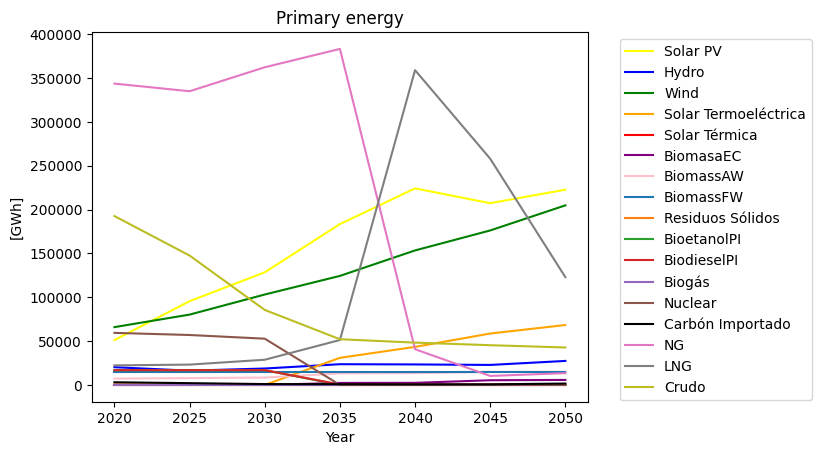

In [12]:
y2020solpv=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLPV')) & (d_vars['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025solpv=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLPV')) & (d_vars['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030solpv=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLPV')) & (d_vars['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035solpv=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLPV')) & (d_vars['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040solpv=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLPV')) & (d_vars['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045solpv=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLPV')) & (d_vars['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050solpv=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLPV')) & (d_vars['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020wind=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEWINON')) & (d_vars['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025wind=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEWINON')) & (d_vars['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030wind=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEWINON')) & (d_vars['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035wind=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEWINON')) & (d_vars['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040wind=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEWINON')) & (d_vars['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045wind=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEWINON')) & (d_vars['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050wind=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEWINON')) & (d_vars['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020solth=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLTH')) & (d_vars['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025solth=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLTH')) & (d_vars['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030solth=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLTH')) & (d_vars['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035solth=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLTH')) & (d_vars['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040solth=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLTH')) & (d_vars['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045solth=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLTH')) & (d_vars['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050solth=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLTH')) & (d_vars['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020solte=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLTE')) & (d_vars['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025solte=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLTE')) & (d_vars['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030solte=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLTE')) & (d_vars['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035solte=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLTE')) & (d_vars['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040solte=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLTE')) & (d_vars['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045solte=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLTE')) & (d_vars['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050solte=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESOLTE')) & (d_vars['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020biomec=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMEC')) & (d_vars['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025biomec=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMEC')) & (d_vars['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030biomec=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMEC')) & (d_vars['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035biomec=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMEC')) & (d_vars['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040biomec=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMEC')) & (d_vars['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045biomec=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMEC')) & (d_vars['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050biomec=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMEC')) & (d_vars['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020biomaw=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMAW')) & (d_vars['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025biomaw=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMAW')) & (d_vars['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030biomaw=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMAW')) & (d_vars['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035biomaw=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMAW')) & (d_vars['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040biomaw=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMAW')) & (d_vars['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045biomaw=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMAW')) & (d_vars['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050biomaw=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMAW')) & (d_vars['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020biomfw=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMFW')) & (d_vars['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025biomfw=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMFW')) & (d_vars['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030biomfw=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMFW')) & (d_vars['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035biomfw=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMFW')) & (d_vars['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040biomfw=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMFW')) & (d_vars['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045biomfw=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMFW')) & (d_vars['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050biomfw=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOMFW')) & (d_vars['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020swast=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESWAST')) & (d_vars['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025swast=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESWAST')) & (d_vars['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030swast=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESWAST')) & (d_vars['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035swast=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESWAST')) & (d_vars['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040swast=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESWAST')) & (d_vars['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045swast=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESWAST')) & (d_vars['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050swast=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPESWAST')) & (d_vars['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020bioethpi=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOETHPI')) & (d_vars['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025bioethpi=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOETHPI')) & (d_vars['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030bioethpi=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOETHPI')) & (d_vars['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035bioethpi=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOETHPI')) & (d_vars['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040bioethpi=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOETHPI')) & (d_vars['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045bioethpi=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOETHPI')) & (d_vars['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050bioethpi=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOETHPI')) & (d_vars['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020biodiepi=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIODIEPI')) & (d_vars['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025biodiepi=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIODIEPI')) & (d_vars['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030biodiepi=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIODIEPI')) & (d_vars['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035biodiepi=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIODIEPI')) & (d_vars['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040biodiepi=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIODIEPI')) & (d_vars['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045biodiepi=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIODIEPI')) & (d_vars['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050biodiepi=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIODIEPI')) & (d_vars['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020biogas=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOGAS')) & (d_vars['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025biogas=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOGAS')) & (d_vars['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030biogas=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOGAS')) & (d_vars['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035biogas=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOGAS')) & (d_vars['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040biogas=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOGAS')) & (d_vars['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045biogas=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOGAS')) & (d_vars['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050biogas=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEBIOGAS')) & (d_vars['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020hydro=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEHYDRR')) & (d_vars['vQPEDom'].sYear=='y2020')].vQPEDom.sum() + d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEHYDRC')) & (d_vars['vQPEDom'].sYear=='y2020')].vQPEDom.sum() + d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEMNHYDR')) & (d_vars['vQPEDom'].sYear=='y2020')].vQPEDom.sum()
y2025hydro=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEHYDRR')) & (d_vars['vQPEDom'].sYear=='y2025')].vQPEDom.sum() + d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEHYDRC')) & (d_vars['vQPEDom'].sYear=='y2025')].vQPEDom.sum() + d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEMNHYDR')) & (d_vars['vQPEDom'].sYear=='y2025')].vQPEDom.sum()
y2030hydro=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEHYDRR')) & (d_vars['vQPEDom'].sYear=='y2030')].vQPEDom.sum() + d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEHYDRC')) & (d_vars['vQPEDom'].sYear=='y2030')].vQPEDom.sum() + d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEMNHYDR')) & (d_vars['vQPEDom'].sYear=='y2030')].vQPEDom.sum()
y2035hydro=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEHYDRR')) & (d_vars['vQPEDom'].sYear=='y2035')].vQPEDom.sum() + d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEHYDRC')) & (d_vars['vQPEDom'].sYear=='y2035')].vQPEDom.sum() + d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEMNHYDR')) & (d_vars['vQPEDom'].sYear=='y2035')].vQPEDom.sum()
y2040hydro=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEHYDRR')) & (d_vars['vQPEDom'].sYear=='y2040')].vQPEDom.sum() + d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEHYDRC')) & (d_vars['vQPEDom'].sYear=='y2040')].vQPEDom.sum() + d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEMNHYDR')) & (d_vars['vQPEDom'].sYear=='y2040')].vQPEDom.sum()
y2045hydro=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEHYDRR')) & (d_vars['vQPEDom'].sYear=='y2045')].vQPEDom.sum() + d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEHYDRC')) & (d_vars['vQPEDom'].sYear=='y2045')].vQPEDom.sum() + d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEMNHYDR')) & (d_vars['vQPEDom'].sYear=='y2045')].vQPEDom.sum()
y2050hydro=d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEHYDRR')) & (d_vars['vQPEDom'].sYear=='y2050')].vQPEDom.sum() + d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEHYDRC')) & (d_vars['vQPEDom'].sYear=='y2050')].vQPEDom.sum() + d_vars['vQPEDom'][(d_vars['vQPEDom'].sPE.str.startswith('sPEMNHYDR')) & (d_vars['vQPEDom'].sYear=='y2050')].vQPEDom.sum()

y2020nuclear=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPENUCLE')) & (d_vars['vQPEImp'].sYear=='y2020')].vQPEImp.sum()
y2025nuclear=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPENUCLE')) & (d_vars['vQPEImp'].sYear=='y2025')].vQPEImp.sum()
y2030nuclear=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPENUCLE')) & (d_vars['vQPEImp'].sYear=='y2030')].vQPEImp.sum()
y2035nuclear=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPENUCLE')) & (d_vars['vQPEImp'].sYear=='y2035')].vQPEImp.sum()
y2040nuclear=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPENUCLE')) & (d_vars['vQPEImp'].sYear=='y2040')].vQPEImp.sum()
y2045nuclear=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPENUCLE')) & (d_vars['vQPEImp'].sYear=='y2045')].vQPEImp.sum()
y2050nuclear=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPENUCLE')) & (d_vars['vQPEImp'].sYear=='y2050')].vQPEImp.sum()

y2020impcoal=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPEIMPCO')) & (d_vars['vQPEImp'].sYear=='y2020')].vQPEImp.sum()
y2025impcoal=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPEIMPCO')) & (d_vars['vQPEImp'].sYear=='y2025')].vQPEImp.sum()
y2030impcoal=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPEIMPCO')) & (d_vars['vQPEImp'].sYear=='y2030')].vQPEImp.sum()
y2035impcoal=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPEIMPCO')) & (d_vars['vQPEImp'].sYear=='y2035')].vQPEImp.sum()
y2040impcoal=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPEIMPCO')) & (d_vars['vQPEImp'].sYear=='y2040')].vQPEImp.sum()
y2045impcoal=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPEIMPCO')) & (d_vars['vQPEImp'].sYear=='y2045')].vQPEImp.sum()
y2050impcoal=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPEIMPCO')) & (d_vars['vQPEImp'].sYear=='y2050')].vQPEImp.sum()

y2020nagas=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPENAGAS')) & (d_vars['vQPEImp'].sYear=='y2020')].vQPEImp.sum()
y2025nagas=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPENAGAS')) & (d_vars['vQPEImp'].sYear=='y2025')].vQPEImp.sum()
y2030nagas=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPENAGAS')) & (d_vars['vQPEImp'].sYear=='y2030')].vQPEImp.sum()
y2035nagas=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPENAGAS')) & (d_vars['vQPEImp'].sYear=='y2035')].vQPEImp.sum()
y2040nagas=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPENAGAS')) & (d_vars['vQPEImp'].sYear=='y2040')].vQPEImp.sum()
y2045nagas=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPENAGAS')) & (d_vars['vQPEImp'].sYear=='y2045')].vQPEImp.sum()
y2050nagas=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPENAGAS')) & (d_vars['vQPEImp'].sYear=='y2050')].vQPEImp.sum()

y2020lngas=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPELNGAS')) & (d_vars['vQPEImp'].sYear=='y2020')].vQPEImp.sum()
y2025lngas=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPELNGAS')) & (d_vars['vQPEImp'].sYear=='y2025')].vQPEImp.sum()
y2030lngas=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPELNGAS')) & (d_vars['vQPEImp'].sYear=='y2030')].vQPEImp.sum()
y2035lngas=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPELNGAS')) & (d_vars['vQPEImp'].sYear=='y2035')].vQPEImp.sum()
y2040lngas=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPELNGAS')) & (d_vars['vQPEImp'].sYear=='y2040')].vQPEImp.sum()
y2045lngas=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPELNGAS')) & (d_vars['vQPEImp'].sYear=='y2045')].vQPEImp.sum()
y2050lngas=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPELNGAS')) & (d_vars['vQPEImp'].sYear=='y2050')].vQPEImp.sum()

y2020croil=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPECROIL')) & (d_vars['vQPEImp'].sYear=='y2020')].vQPEImp.sum()
y2025croil=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPECROIL')) & (d_vars['vQPEImp'].sYear=='y2025')].vQPEImp.sum()
y2030croil=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPECROIL')) & (d_vars['vQPEImp'].sYear=='y2030')].vQPEImp.sum()
y2035croil=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPECROIL')) & (d_vars['vQPEImp'].sYear=='y2035')].vQPEImp.sum()
y2040croil=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPECROIL')) & (d_vars['vQPEImp'].sYear=='y2040')].vQPEImp.sum()
y2045croil=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPECROIL')) & (d_vars['vQPEImp'].sYear=='y2045')].vQPEImp.sum()
y2050croil=d_vars['vQPEImp'][(d_vars['vQPEImp'].sPE.str.startswith('sPECROIL')) & (d_vars['vQPEImp'].sYear=='y2050')].vQPEImp.sum()




#Visualize the results in a bar plot for each year unstacking the results for Solar PV and Hydro
import matplotlib.pyplot as plt
import numpy as np

years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
solpv = [y2020solpv, y2025solpv, y2030solpv, y2035solpv, y2040solpv, y2045solpv, y2050solpv]
hydro = [y2020hydro, y2025hydro, y2030hydro, y2035hydro, y2040hydro, y2045hydro, y2050hydro]
wind = [y2020wind, y2025wind, y2030wind, y2035wind, y2040wind, y2045wind, y2050wind]
solte = [y2020solte, y2025solte, y2030solte, y2035solte, y2040solte, y2045solte, y2050solte]
solth = [y2020solth, y2025solth, y2030solth, y2035solth, y2040solth, y2045solth, y2050solth]
biomec = [y2020biomec, y2025biomec, y2030biomec, y2035biomec, y2040biomec, y2045biomec, y2050biomec]
biomaw = [y2020biomaw, y2025biomaw, y2030biomaw, y2035biomaw, y2040biomaw, y2045biomaw, y2050biomaw]
biomfw = [y2020biomfw, y2025biomfw, y2030biomfw, y2035biomfw, y2040biomfw, y2045biomfw, y2050biomfw]
swast = [y2020swast, y2025swast, y2030swast, y2035swast, y2040swast, y2045swast, y2050swast]
bioethpi = [y2020bioethpi, y2025bioethpi, y2030bioethpi, y2035bioethpi, y2040bioethpi, y2045bioethpi, y2050bioethpi]
biodiepi = [y2020biodiepi, y2025biodiepi, y2030biodiepi, y2035biodiepi, y2040biodiepi, y2045biodiepi, y2050biodiepi]
biogas = [y2020biogas, y2025biogas, y2030biogas, y2035biogas, y2040biogas, y2045biogas, y2050biogas]
nuclear = [y2020nuclear, y2025nuclear, y2030nuclear, y2035nuclear, y2040nuclear, y2045nuclear, y2050nuclear]
impcoal = [y2020impcoal, y2025impcoal, y2030impcoal, y2035impcoal, y2040impcoal, y2045impcoal, y2050impcoal]
nagas = [y2020nagas, y2025nagas, y2030nagas, y2035nagas, y2040nagas, y2045nagas, y2050nagas]
lngas = [y2020lngas, y2025lngas, y2030lngas, y2035lngas, y2040lngas, y2045lngas, y2050lngas]
croil = [y2020croil, y2025croil, y2030croil, y2035croil, y2040croil, y2045croil, y2050croil]





plt.plot(years, solpv, label='Solar PV',color='yellow')
plt.plot(years, hydro, label='Hydro',color='blue')
plt.plot(years, wind, label='Wind',color='green')
plt.plot(years,solte, label='Solar Termoeléctrica',color='orange')
plt.plot(years,solth, label='Solar Térmica',color='red')
plt.plot(years,biomec, label='BiomasaEC',color='purple')
plt.plot(years,biomaw, label='BiomassAW',color='pink')
plt.plot(years,biomfw, label='BiomassFW')
plt.plot(years,swast, label='Residuos Sólidos')
plt.plot(years,bioethpi, label='BioetanolPI')
plt.plot(years,biodiepi, label='BiodieselPI')
plt.plot(years,biogas, label='Biogás')
plt.plot(years,nuclear, label='Nuclear')
plt.plot(years,impcoal, label='Carbón Importado',color='black')
plt.plot(years,nagas, label='NG')
plt.plot(years,lngas, label='LNG')
plt.plot(years,croil, label='Crudo')
plt.xlabel('Year')
plt.ylabel('[GWh]')
plt.title('Primary energy')
# Add a legend outside of the plot
# Change the color of the plots to gradient of blue

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [10]:
d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sYear=='y2050') & (d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOIGCC'))].vQCEPriOUT.sum()

0.0

C:\Users\marios\AppData\Local\Temp\ipykernel_42580\1526215219.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y2020_PEImp = y2020_PEImp[~y2020_PEImp.sPE.str.startswith('sPEHYDRR')][~y2020_PEImp.sPE.str.startswith('sPEHYDRC')][~y2020_PEImp.sPE.str.startswith('sPEMNHY')][~y2020_PEImp.sPE.str.startswith('sPEWINON')][~y2020_PEImp.sPE.str.startswith('sPEWINOF')][~y2020_PEImp.sPE.str.startswith('sPESOLPV')][~y2020_PEImp.sPE.str.startswith('sPESOLTE')][~y2020_PEImp.sPE.str.startswith('sPESOLTH')][~y2020_PEImp.sPE.str.startswith('sPEBIOMEC')][~y2020_PEImp.sPE.str.startswith('sPEBIOMAW')][~y2020_PEImp.sPE.str.startswith('sPEBIOMFW')][~y2020_PEImp.sPE.str.startswith('sPESWAST')][~y2020_PEImp.sPE.str.startswith('sPEBIOETHPI')][~y2020_PEImp.sPE.str.startswith('sPEBIODIEPI')][~y2020_PEImp.sPE.str.startswith('sPEBIOGAS')][~y2020_PEImp.sPE.str.startswith('sPEHUMANE')]
C:\Users\marios\AppData\Local\Temp\ipykernel_42580\1526215219.py:10: UserWarning: Boolean Series 

C:\Users\marios\AppData\Local\Temp\ipykernel_42580\1526215219.py:46: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


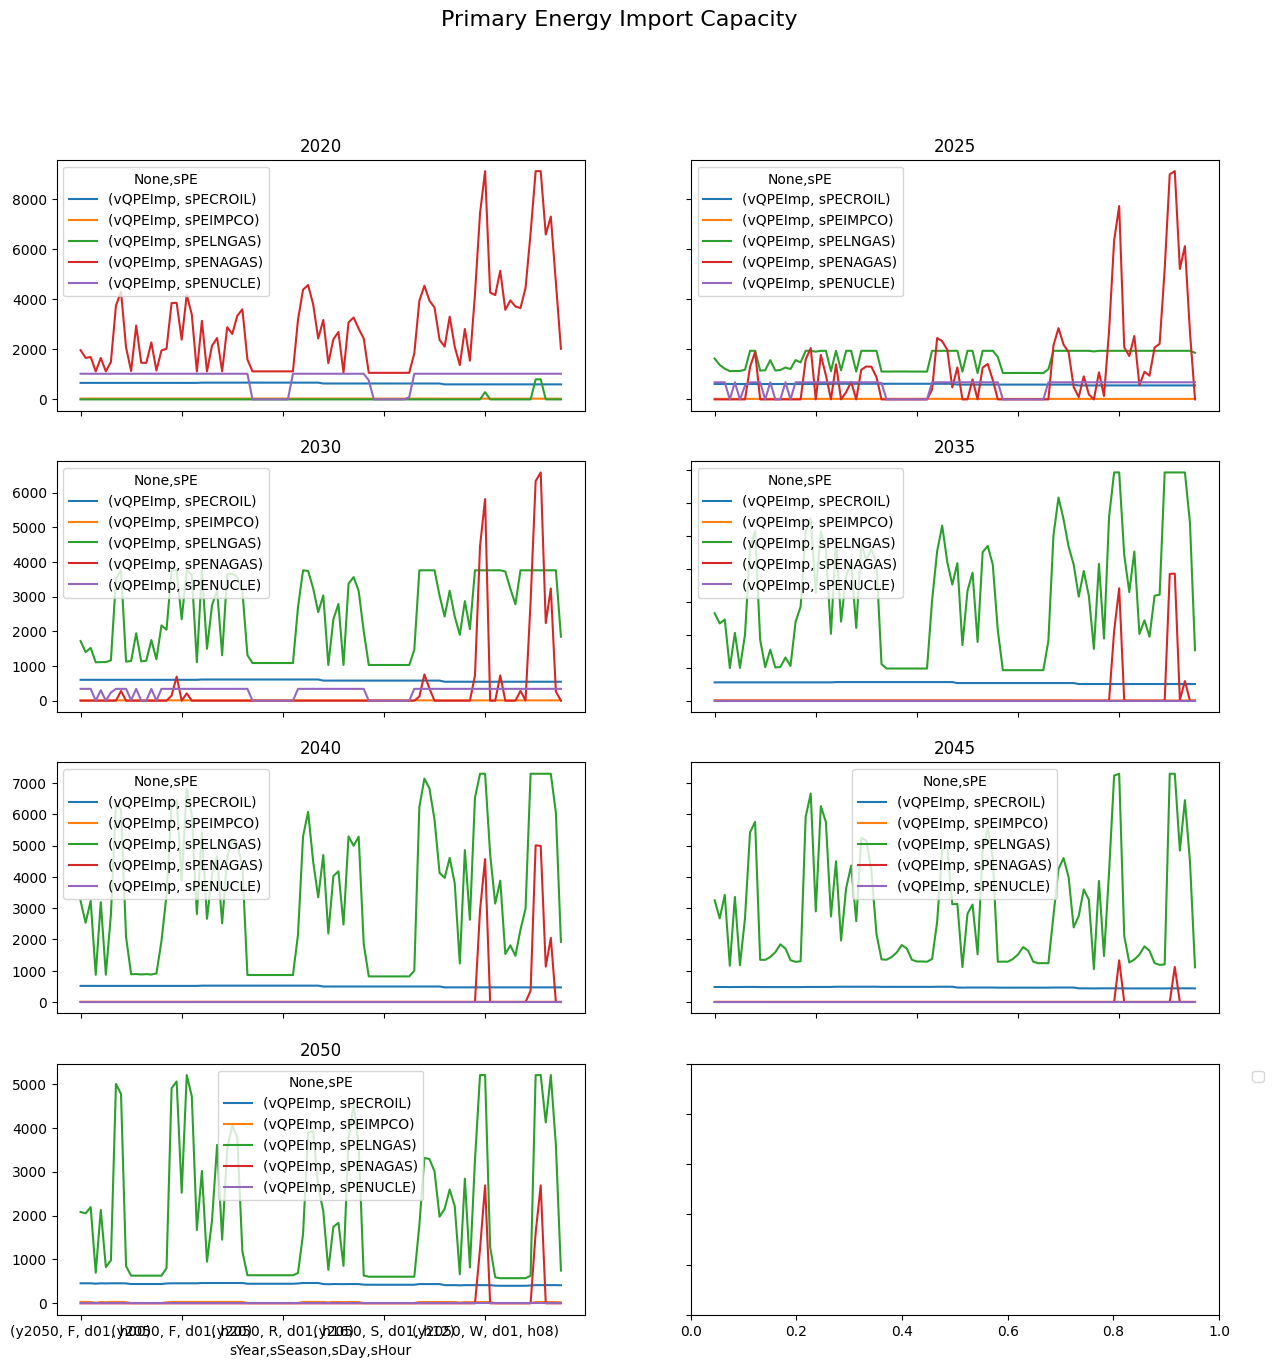

In [11]:
y2020_PEImp = d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2020')]
y2025_PEImp = d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2025')]
y2030_PEImp = d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2030')]
y2035_PEImp = d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2035')]
y2040_PEImp = d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2040')]
y2045_PEImp = d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2045')]
y2050_PEImp = d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2050')]

# Drop all data that is not related to the primary energy import capacity: sPEHYDRR, sPEHYDRC, sPEMNHY,sPEWINON,sPEWINOF,sPESOLPV,sPESOLTE,sPESOLTH,sPEBIOMEC,sPEBIOMAW,sPEBIOMFW,sPESWAST,sPEBIOETHPI,sPEBIODIEPI,sPEBIOGAS ,sPEHUMANE
y2020_PEImp = y2020_PEImp[~y2020_PEImp.sPE.str.startswith('sPEHYDRR')][~y2020_PEImp.sPE.str.startswith('sPEHYDRC')][~y2020_PEImp.sPE.str.startswith('sPEMNHY')][~y2020_PEImp.sPE.str.startswith('sPEWINON')][~y2020_PEImp.sPE.str.startswith('sPEWINOF')][~y2020_PEImp.sPE.str.startswith('sPESOLPV')][~y2020_PEImp.sPE.str.startswith('sPESOLTE')][~y2020_PEImp.sPE.str.startswith('sPESOLTH')][~y2020_PEImp.sPE.str.startswith('sPEBIOMEC')][~y2020_PEImp.sPE.str.startswith('sPEBIOMAW')][~y2020_PEImp.sPE.str.startswith('sPEBIOMFW')][~y2020_PEImp.sPE.str.startswith('sPESWAST')][~y2020_PEImp.sPE.str.startswith('sPEBIOETHPI')][~y2020_PEImp.sPE.str.startswith('sPEBIODIEPI')][~y2020_PEImp.sPE.str.startswith('sPEBIOGAS')][~y2020_PEImp.sPE.str.startswith('sPEHUMANE')]
y2025_PEImp = y2025_PEImp[~y2025_PEImp.sPE.str.startswith('sPEHYDRR')][~y2025_PEImp.sPE.str.startswith('sPEHYDRC')][~y2025_PEImp.sPE.str.startswith('sPEMNHY')][~y2025_PEImp.sPE.str.startswith('sPEWINON')][~y2025_PEImp.sPE.str.startswith('sPEWINOF')][~y2025_PEImp.sPE.str.startswith('sPESOLPV')][~y2025_PEImp.sPE.str.startswith('sPESOLTE')][~y2025_PEImp.sPE.str.startswith('sPESOLTH')][~y2025_PEImp.sPE.str.startswith('sPEBIOMEC')][~y2025_PEImp.sPE.str.startswith('sPEBIOMAW')][~y2025_PEImp.sPE.str.startswith('sPEBIOMFW')][~y2025_PEImp.sPE.str.startswith('sPESWAST')][~y2025_PEImp.sPE.str.startswith('sPEBIOETHPI')][~y2025_PEImp.sPE.str.startswith('sPEBIODIEPI')][~y2025_PEImp.sPE.str.startswith('sPEBIOGAS')][~y2025_PEImp.sPE.str.startswith('sPEHUMANE')]
y2030_PEImp = y2030_PEImp[~y2030_PEImp.sPE.str.startswith('sPEHYDRR')][~y2030_PEImp.sPE.str.startswith('sPEHYDRC')][~y2030_PEImp.sPE.str.startswith('sPEMNHY')][~y2030_PEImp.sPE.str.startswith('sPEWINON')][~y2030_PEImp.sPE.str.startswith('sPEWINOF')][~y2030_PEImp.sPE.str.startswith('sPESOLPV')][~y2030_PEImp.sPE.str.startswith('sPESOLTE')][~y2030_PEImp.sPE.str.startswith('sPESOLTH')][~y2030_PEImp.sPE.str.startswith('sPEBIOMEC')][~y2030_PEImp.sPE.str.startswith('sPEBIOMAW')][~y2030_PEImp.sPE.str.startswith('sPEBIOMFW')][~y2030_PEImp.sPE.str.startswith('sPESWAST')][~y2030_PEImp.sPE.str.startswith('sPEBIOETHPI')][~y2030_PEImp.sPE.str.startswith('sPEBIODIEPI')][~y2030_PEImp.sPE.str.startswith('sPEBIOGAS')][~y2030_PEImp.sPE.str.startswith('sPEHUMANE')]
y2035_PEImp = y2035_PEImp[~y2035_PEImp.sPE.str.startswith('sPEHYDRR')][~y2035_PEImp.sPE.str.startswith('sPEHYDRC')][~y2035_PEImp.sPE.str.startswith('sPEMNHY')][~y2035_PEImp.sPE.str.startswith('sPEWINON')][~y2035_PEImp.sPE.str.startswith('sPEWINOF')][~y2035_PEImp.sPE.str.startswith('sPESOLPV')][~y2035_PEImp.sPE.str.startswith('sPESOLTE')][~y2035_PEImp.sPE.str.startswith('sPESOLTH')][~y2035_PEImp.sPE.str.startswith('sPEBIOMEC')][~y2035_PEImp.sPE.str.startswith('sPEBIOMAW')][~y2035_PEImp.sPE.str.startswith('sPEBIOMFW')][~y2035_PEImp.sPE.str.startswith('sPESWAST')][~y2035_PEImp.sPE.str.startswith('sPEBIOETHPI')][~y2035_PEImp.sPE.str.startswith('sPEBIODIEPI')][~y2035_PEImp.sPE.str.startswith('sPEBIOGAS')][~y2035_PEImp.sPE.str.startswith('sPEHUMANE')]
y2040_PEImp = y2040_PEImp[~y2040_PEImp.sPE.str.startswith('sPEHYDRR')][~y2040_PEImp.sPE.str.startswith('sPEHYDRC')][~y2040_PEImp.sPE.str.startswith('sPEMNHY')][~y2040_PEImp.sPE.str.startswith('sPEWINON')][~y2040_PEImp.sPE.str.startswith('sPEWINOF')][~y2040_PEImp.sPE.str.startswith('sPESOLPV')][~y2040_PEImp.sPE.str.startswith('sPESOLTE')][~y2040_PEImp.sPE.str.startswith('sPESOLTH')][~y2040_PEImp.sPE.str.startswith('sPEBIOMEC')][~y2040_PEImp.sPE.str.startswith('sPEBIOMAW')][~y2040_PEImp.sPE.str.startswith('sPEBIOMFW')][~y2040_PEImp.sPE.str.startswith('sPESWAST')][~y2040_PEImp.sPE.str.startswith('sPEBIOETHPI')][~y2040_PEImp.sPE.str.startswith('sPEBIODIEPI')][~y2040_PEImp.sPE.str.startswith('sPEBIOGAS')][~y2040_PEImp.sPE.str.startswith('sPEHUMANE')]
y2045_PEImp = y2045_PEImp[~y2045_PEImp.sPE.str.startswith('sPEHYDRR')][~y2045_PEImp.sPE.str.startswith('sPEHYDRC')][~y2045_PEImp.sPE.str.startswith('sPEMNHY')][~y2045_PEImp.sPE.str.startswith('sPEWINON')][~y2045_PEImp.sPE.str.startswith('sPEWINOF')][~y2045_PEImp.sPE.str.startswith('sPESOLPV')][~y2045_PEImp.sPE.str.startswith('sPESOLTE')][~y2045_PEImp.sPE.str.startswith('sPESOLTH')][~y2045_PEImp.sPE.str.startswith('sPEBIOMEC')][~y2045_PEImp.sPE.str.startswith('sPEBIOMAW')][~y2045_PEImp.sPE.str.startswith('sPEBIOMFW')][~y2045_PEImp.sPE.str.startswith('sPESWAST')][~y2045_PEImp.sPE.str.startswith('sPEBIOETHPI')][~y2045_PEImp.sPE.str.startswith('sPEBIODIEPI')][~y2045_PEImp.sPE.str.startswith('sPEBIOGAS')][~y2045_PEImp.sPE.str.startswith('sPEHUMANE')]
y2050_PEImp = y2050_PEImp[~y2050_PEImp.sPE.str.startswith('sPEHYDRR')][~y2050_PEImp.sPE.str.startswith('sPEHYDRC')][~y2050_PEImp.sPE.str.startswith('sPEMNHY')][~y2050_PEImp.sPE.str.startswith('sPEWINON')][~y2050_PEImp.sPE.str.startswith('sPEWINOF')][~y2050_PEImp.sPE.str.startswith('sPESOLPV')][~y2050_PEImp.sPE.str.startswith('sPESOLTE')][~y2050_PEImp.sPE.str.startswith('sPESOLTH')][~y2050_PEImp.sPE.str.startswith('sPEBIOMEC')][~y2050_PEImp.sPE.str.startswith('sPEBIOMAW')][~y2050_PEImp.sPE.str.startswith('sPEBIOMFW')][~y2050_PEImp.sPE.str.startswith('sPESWAST')][~y2050_PEImp.sPE.str.startswith('sPEBIOETHPI')][~y2050_PEImp.sPE.str.startswith('sPEBIODIEPI')][~y2050_PEImp.sPE.str.startswith('sPEBIOGAS')][~y2050_PEImp.sPE.str.startswith('sPEHUMANE')]


# # set index to sPE, sYear, sSeason, sDay, sHour and the values to vQPEImp and unstack the table
y2020_PEImp = y2020_PEImp.set_index(['sPE', 'sYear', 'sSeason', 'sDay', 'sHour'])
y2025_PEImp = y2025_PEImp.set_index(['sPE', 'sYear', 'sSeason', 'sDay', 'sHour'])
y2030_PEImp = y2030_PEImp.set_index(['sPE', 'sYear', 'sSeason', 'sDay', 'sHour'])
y2035_PEImp = y2035_PEImp.set_index(['sPE', 'sYear', 'sSeason', 'sDay', 'sHour'])
y2040_PEImp = y2040_PEImp.set_index(['sPE', 'sYear', 'sSeason', 'sDay', 'sHour'])
y2045_PEImp = y2045_PEImp.set_index(['sPE', 'sYear', 'sSeason', 'sDay', 'sHour'])
y2050_PEImp = y2050_PEImp.set_index(['sPE', 'sYear', 'sSeason', 'sDay', 'sHour'])

# # Graph 7 SUBPLOTS the results with the index as x-axis and the values of vQPEImp as y-axis.
# Put the corresponding title to each subplot

fig, axs = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Primary Energy Import Capacity', fontsize=16)
y2020_PEImp.unstack('sPE').plot(ax=axs[0, 0], title='2020', legend=True)
y2025_PEImp.unstack('sPE').plot(ax=axs[0, 1], title='2025', legend=True)
y2030_PEImp.unstack('sPE').plot(ax=axs[1, 0], title='2030', legend=True)
y2035_PEImp.unstack('sPE').plot(ax=axs[1, 1], title='2035', legend=True)
y2040_PEImp.unstack('sPE').plot(ax=axs[2, 0], title='2040', legend=True)
y2045_PEImp.unstack('sPE').plot(ax=axs[2, 1], title='2045', legend=True)
y2050_PEImp.unstack('sPE').plot(ax=axs[3, 0], title='2050', legend=True)

# Dont show x axis labels for the first 7 subplots
for ax in axs.flat:
    ax.label_outer()

# Add a legend for all images
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


plt.show()



C:\Users\marios\AppData\Local\Temp\ipykernel_41364\3144384501.py:77: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


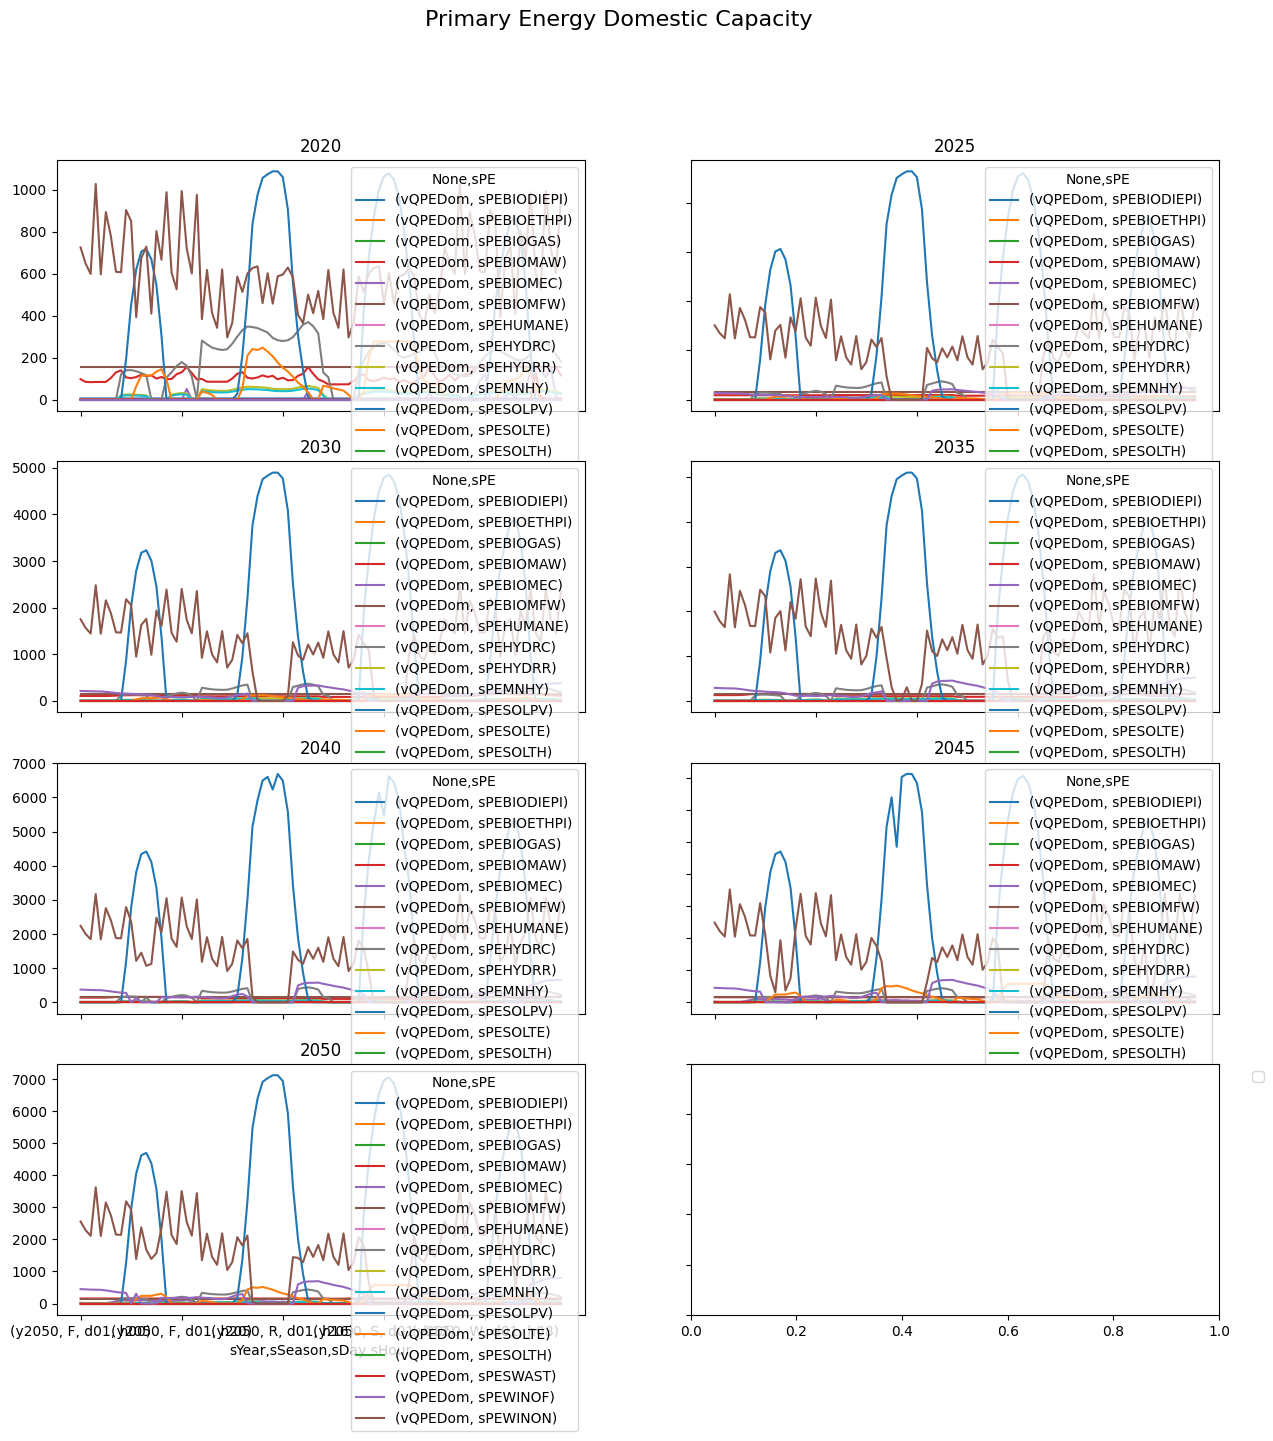

In [12]:
#vQPEDom
y2020_PEDom = d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2020')]
y2025_PEDom = d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2025')]
y2030_PEDom = d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2030')]
y2035_PEDom = d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2035')]
y2040_PEDom = d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2040')]
y2045_PEDom = d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2045')]
y2050_PEDom = d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2050')]

# Drop all data that is not related to the primary energy domestic capacity: sPENUCLE,sPEIMPCO,sPENAGAS,sPELNGAS,sPECROIL
y2020_PEDom = y2020_PEDom[~y2020_PEDom.sPE.str.startswith('sPENUCLE')]
y2020_PEDom = y2020_PEDom[~y2020_PEDom.sPE.str.startswith('sPEIMPCO')]
y2020_PEDom = y2020_PEDom[~y2020_PEDom.sPE.str.startswith('sPENAGAS')]
y2020_PEDom = y2020_PEDom[~y2020_PEDom.sPE.str.startswith('sPELNGAS')]
y2020_PEDom = y2020_PEDom[~y2020_PEDom.sPE.str.startswith('sPECROIL')]

y2025_PEDom = y2025_PEDom[~y2025_PEDom.sPE.str.startswith('sPENUCLE')]
y2025_PEDom = y2025_PEDom[~y2025_PEDom.sPE.str.startswith('sPEIMPCO')]
y2025_PEDom = y2025_PEDom[~y2025_PEDom.sPE.str.startswith('sPENAGAS')]
y2025_PEDom = y2025_PEDom[~y2025_PEDom.sPE.str.startswith('sPELNGAS')]
y2025_PEDom = y2025_PEDom[~y2025_PEDom.sPE.str.startswith('sPECROIL')]
y2030_PEDom = y2030_PEDom[~y2030_PEDom.sPE.str.startswith('sPENUCLE')]
y2030_PEDom = y2030_PEDom[~y2030_PEDom.sPE.str.startswith('sPEIMPCO')]
y2030_PEDom = y2030_PEDom[~y2030_PEDom.sPE.str.startswith('sPENAGAS')]
y2030_PEDom = y2030_PEDom[~y2030_PEDom.sPE.str.startswith('sPELNGAS')]
y2030_PEDom = y2030_PEDom[~y2030_PEDom.sPE.str.startswith('sPECROIL')]
y2035_PEDom = y2035_PEDom[~y2035_PEDom.sPE.str.startswith('sPENUCLE')]
y2035_PEDom = y2035_PEDom[~y2035_PEDom.sPE.str.startswith('sPEIMPCO')]
y2035_PEDom = y2035_PEDom[~y2035_PEDom.sPE.str.startswith('sPENAGAS')]
y2035_PEDom = y2035_PEDom[~y2035_PEDom.sPE.str.startswith('sPELNGAS')]
y2035_PEDom = y2035_PEDom[~y2035_PEDom.sPE.str.startswith('sPECROIL')]
y2040_PEDom = y2040_PEDom[~y2040_PEDom.sPE.str.startswith('sPENUCLE')]
y2040_PEDom = y2040_PEDom[~y2040_PEDom.sPE.str.startswith('sPEIMPCO')]
y2040_PEDom = y2040_PEDom[~y2040_PEDom.sPE.str.startswith('sPENAGAS')]
y2040_PEDom = y2040_PEDom[~y2040_PEDom.sPE.str.startswith('sPELNGAS')]
y2040_PEDom = y2040_PEDom[~y2040_PEDom.sPE.str.startswith('sPECROIL')]
y2045_PEDom = y2045_PEDom[~y2045_PEDom.sPE.str.startswith('sPENUCLE')]
y2045_PEDom = y2045_PEDom[~y2045_PEDom.sPE.str.startswith('sPEIMPCO')]
y2045_PEDom = y2045_PEDom[~y2045_PEDom.sPE.str.startswith('sPENAGAS')]
y2045_PEDom = y2045_PEDom[~y2045_PEDom.sPE.str.startswith('sPELNGAS')]
y2045_PEDom = y2045_PEDom[~y2045_PEDom.sPE.str.startswith('sPECROIL')]
y2050_PEDom = y2050_PEDom[~y2050_PEDom.sPE.str.startswith('sPENUCLE')]
y2050_PEDom = y2050_PEDom[~y2050_PEDom.sPE.str.startswith('sPEIMPCO')]
y2050_PEDom = y2050_PEDom[~y2050_PEDom.sPE.str.startswith('sPENAGAS')]
y2050_PEDom = y2050_PEDom[~y2050_PEDom.sPE.str.startswith('sPELNGAS')]
y2050_PEDom = y2050_PEDom[~y2050_PEDom.sPE.str.startswith('sPECROIL')]



# set index to sPE, sYear, sSeason, sDay, sHour and the values to vQPEImp and unstack the table
y2020_PEDom = y2020_PEDom.set_index(['sPE', 'sYear', 'sSeason', 'sDay', 'sHour'])
y2025_PEDom = y2025_PEDom.set_index(['sPE', 'sYear', 'sSeason', 'sDay', 'sHour'])
y2030_PEDom = y2030_PEDom.set_index(['sPE', 'sYear', 'sSeason', 'sDay', 'sHour'])
y2035_PEDom = y2035_PEDom.set_index(['sPE', 'sYear', 'sSeason', 'sDay', 'sHour'])
y2040_PEDom = y2040_PEDom.set_index(['sPE', 'sYear', 'sSeason', 'sDay', 'sHour'])
y2045_PEDom = y2045_PEDom.set_index(['sPE', 'sYear', 'sSeason', 'sDay', 'sHour'])
y2050_PEDom = y2050_PEDom.set_index(['sPE', 'sYear', 'sSeason', 'sDay', 'sHour'])

# Graph 7 SUBPLOTS the results with the index as x-axis and the values of vQPEImp as y-axis.
# Put the corresponding title to each subplot

fig, axs = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Primary Energy Domestic Capacity', fontsize=16)
y2020_PEDom.unstack('sPE').plot(ax=axs[0, 0], title='2020', legend=True)
y2025_PEDom.unstack('sPE').plot(ax=axs[0, 1], title='2025', legend=True)
y2030_PEDom.unstack('sPE').plot(ax=axs[1, 0], title='2030', legend=True)
y2035_PEDom.unstack('sPE').plot(ax=axs[1, 1], title='2035', legend=True)
y2040_PEDom.unstack('sPE').plot(ax=axs[2, 0], title='2040', legend=True)
y2045_PEDom.unstack('sPE').plot(ax=axs[2, 1], title='2045', legend=True)
y2050_PEDom.unstack('sPE').plot(ax=axs[3, 0], title='2050', legend=True)

# Dont show x axis labels for the first 7 subplots
for ax in axs.flat:
    ax.label_outer()

# Add a legend for all images
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')



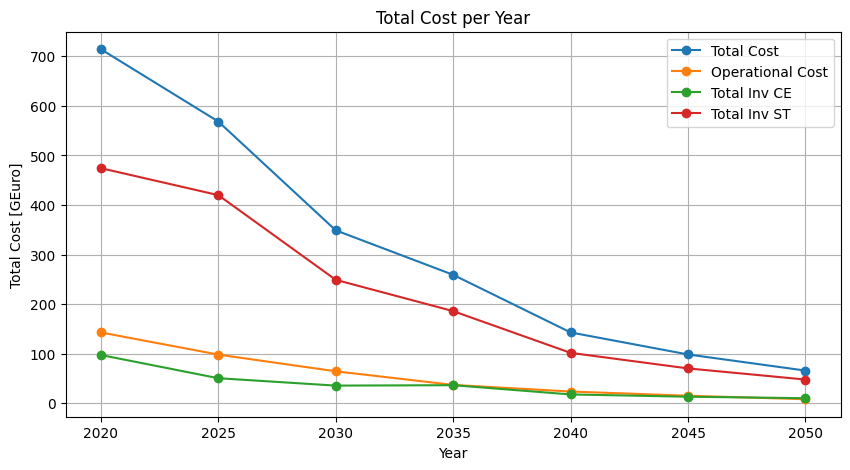

In [16]:
# vTotalCost
y2020=d_vars['vTotalCost'][(d_vars['vTotalCost'].sYear=='y2020')].vTotalCost.sum()
y2025=d_vars['vTotalCost'][(d_vars['vTotalCost'].sYear=='y2025')].vTotalCost.sum()
y2030=d_vars['vTotalCost'][(d_vars['vTotalCost'].sYear=='y2030')].vTotalCost.sum()
y2035=d_vars['vTotalCost'][(d_vars['vTotalCost'].sYear=='y2035')].vTotalCost.sum()
y2040=d_vars['vTotalCost'][(d_vars['vTotalCost'].sYear=='y2040')].vTotalCost.sum()
y2045=d_vars['vTotalCost'][(d_vars['vTotalCost'].sYear=='y2045')].vTotalCost.sum()
y2050=d_vars['vTotalCost'][(d_vars['vTotalCost'].sYear=='y2050')].vTotalCost.sum()

y2020opcost=d_vars['vOpCost'][(d_vars['vOpCost'].sYear=='y2020')].vOpCost.sum()
y2025opcost=d_vars['vOpCost'][(d_vars['vOpCost'].sYear=='y2025')].vOpCost.sum()
y2030opcost=d_vars['vOpCost'][(d_vars['vOpCost'].sYear=='y2030')].vOpCost.sum()
y2035opcost=d_vars['vOpCost'][(d_vars['vOpCost'].sYear=='y2035')].vOpCost.sum()
y2040opcost=d_vars['vOpCost'][(d_vars['vOpCost'].sYear=='y2040')].vOpCost.sum()
y2045opcost=d_vars['vOpCost'][(d_vars['vOpCost'].sYear=='y2045')].vOpCost.sum()
y2050opcost=d_vars['vOpCost'][(d_vars['vOpCost'].sYear=='y2050')].vOpCost.sum()

y2020invCE=d_vars['vInvCostCE'][(d_vars['vInvCostCE'].sYear=='y2020')].vInvCostCE.sum()
y2025invCE=d_vars['vInvCostCE'][(d_vars['vInvCostCE'].sYear=='y2025')].vInvCostCE.sum()
y2030invCE=d_vars['vInvCostCE'][(d_vars['vInvCostCE'].sYear=='y2030')].vInvCostCE.sum()
y2035invCE=d_vars['vInvCostCE'][(d_vars['vInvCostCE'].sYear=='y2035')].vInvCostCE.sum()
y2040invCE=d_vars['vInvCostCE'][(d_vars['vInvCostCE'].sYear=='y2040')].vInvCostCE.sum()
y2045invCE=d_vars['vInvCostCE'][(d_vars['vInvCostCE'].sYear=='y2045')].vInvCostCE.sum()
y2050invCE=d_vars['vInvCostCE'][(d_vars['vInvCostCE'].sYear=='y2050')].vInvCostCE.sum()

# InvCostST
# Now lets graph the investment costs for supply technologies
y2020invST = d_vars['vInvCostST'][(d_vars['vInvCostST'].sYear=='y2020')].vInvCostST.sum()
y2025invST = d_vars['vInvCostST'][(d_vars['vInvCostST'].sYear=='y2025')].vInvCostST.sum()
y2030invST = d_vars['vInvCostST'][(d_vars['vInvCostST'].sYear=='y2030')].vInvCostST.sum()
y2035invST = d_vars['vInvCostST'][(d_vars['vInvCostST'].sYear=='y2035')].vInvCostST.sum()
y2040invST = d_vars['vInvCostST'][(d_vars['vInvCostST'].sYear=='y2040')].vInvCostST.sum()
y2045invST = d_vars['vInvCostST'][(d_vars['vInvCostST'].sYear=='y2045')].vInvCostST.sum()
y2050invST = d_vars['vInvCostST'][(d_vars['vInvCostST'].sYear=='y2050')].vInvCostST.sum()



years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']

#visualize the results
import matplotlib.pyplot as plt
import numpy as np

years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
TotalCost = [y2020, y2025, y2030, y2035, y2040, y2045, y2050]
OperationalCost = [1e-3*y2020opcost, 1e-3*y2025opcost, 1e-3*y2030opcost, 1e-3*y2035opcost, 1e-3*y2040opcost, 1e-3*y2045opcost, 1e-3*y2050opcost]
TotalInvCE = [y2020invCE, y2025invCE, y2030invCE, y2035invCE, y2040invCE, y2045invCE, y2050invCE]
TotalInvST = [y2020invST, y2025invST, y2030invST, y2035invST, y2040invST, y2045invST, y2050invST]


plt.figure(figsize=(10, 5))
plt.plot(years, TotalCost,marker='o')
plt.plot(years, OperationalCost,marker='o')
plt.plot(years, TotalInvCE,marker='o')
plt.plot(years, TotalInvST,marker='o')
plt.title('Total Cost per Year')
plt.legend(['Total Cost', 'Operational Cost', 'Total Inv CE', 'Total Inv ST'])
plt.xlabel('Year')
plt.ylabel('Total Cost [GEuro]')
plt.grid()
plt.show()


In [12]:
# Use the same data as before but now we will plot the results in a stacked bar plot without the variable TotalCost
import matplotlib.pyplot as plt
import numpy as np

years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
TotalCost = [y2020, y2025, y2030, y2035, y2040, y2045, y2050]
OperationalCost = [1e-3*y2020opcost, 1e-3*y2025opcost, 1e-3*y2030opcost, 1e-3*y2035opcost, 1e-3*y2040opcost, 1e-3*y2045opcost, 1e-3*y2050opcost]
TotalInvCE = [y2020invCE, y2025invCE, y2030invCE, y2035invCE, y2040invCE, y2045invCE, y2050invCE]
TotalInvST = [y2020invST, y2025invST, y2030invST, y2035invST, y2040invST, y2045invST, y2050invST]

plt.figure(figsize=(10, 5))
plt.plot(years, TotalCost, 'ko-')
plt.bar(years, OperationalCost)
plt.bar(years, TotalInvCE, bottom=OperationalCost)
plt.bar(years, TotalInvST, bottom=np.array(OperationalCost)+np.array(TotalInvCE))
plt.title('Total Cost per Year')
plt.legend(['Total Cost','Operational Cost', 'Total Inv CE', 'Total Inv ST'])
plt.xlabel('Year')
plt.ylabel('Total Cost [GEuro]')
plt.grid()
plt.show()

NameError: name 'y2020' is not defined

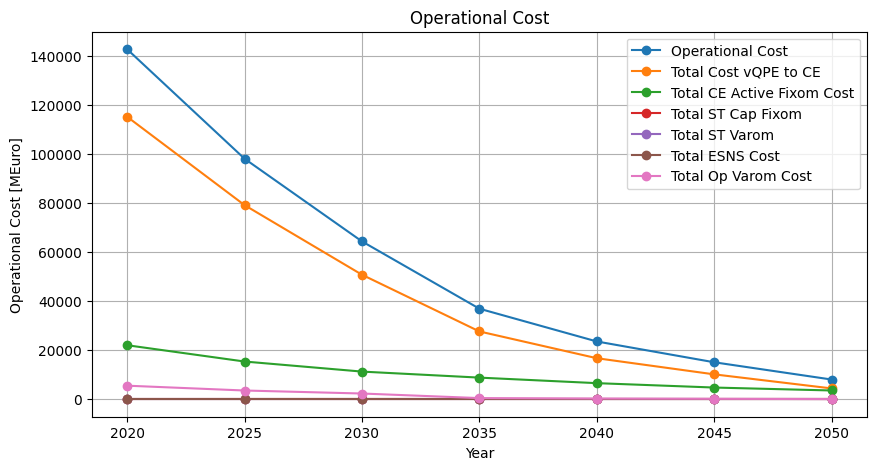

In [18]:
# vOpCost
# lets graph the operational costs
import pandas as pd
pPECost = pd.DataFrame(list(data['pPECost'].items()),columns = ['sPE','pPECost'])
pCEFixom = pd.DataFrame(list(data['pCEFixom'].items()),columns = ['sCE','pCEFixom'])
pSTFixom = pd.DataFrame(list(data['pSTFixom'].items()),columns = ['sST','pSTFixom'])
pSTVarom = pd.DataFrame(list(data['pSTVarom'].items()),columns = ['sST','pSTVarom'])
pESNSCost = data['pESNSCost']

pPECost[['sPE', 'sYear']] = pd.DataFrame(pPECost['sPE'].tolist(), index=pPECost.index)
pSTVarom[['sST', 'sES']] = pd.DataFrame(pSTVarom['sST'].tolist(), index=pSTVarom.index)
pPECost = pPECost.set_index('sPE')
pCEFixom = pCEFixom.set_index('sCE')
pSTFixom = pSTFixom.set_index('sST')
pSTVarom = pSTVarom.set_index(['sST','sES'])

YrGap = data['pYrGap']
DisRate = data['pDisRate'] 

y2020opcost=d_vars['vOpCost'][(d_vars['vOpCost'].sYear=='y2020')].vOpCost.sum()
y2025opcost=d_vars['vOpCost'][(d_vars['vOpCost'].sYear=='y2025')].vOpCost.sum()
y2030opcost=d_vars['vOpCost'][(d_vars['vOpCost'].sYear=='y2030')].vOpCost.sum()
y2035opcost=d_vars['vOpCost'][(d_vars['vOpCost'].sYear=='y2035')].vOpCost.sum()
y2040opcost=d_vars['vOpCost'][(d_vars['vOpCost'].sYear=='y2040')].vOpCost.sum()
y2045opcost=d_vars['vOpCost'][(d_vars['vOpCost'].sYear=='y2045')].vOpCost.sum()
y2050opcost=d_vars['vOpCost'][(d_vars['vOpCost'].sYear=='y2050')].vOpCost.sum()

TotalCost_vQPEtoCE2020 = ((d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2020')].groupby('sPE').sum().vQPEImp + d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2020')].groupby('sPE').sum().vQPEDom))*(pPECost[pPECost.sYear=='y2020'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(1-1)))))
TotalCost_vQPEtoCE2025 = ((d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2025')].groupby('sPE').sum().vQPEImp + d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2025')].groupby('sPE').sum().vQPEDom))*(pPECost[pPECost.sYear=='y2025'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(2-1)))))
TotalCost_vQPEtoCE2030 = ((d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2030')].groupby('sPE').sum().vQPEImp + d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2030')].groupby('sPE').sum().vQPEDom))*(pPECost[pPECost.sYear=='y2030'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(3-1)))))
TotalCost_vQPEtoCE2035 = ((d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2035')].groupby('sPE').sum().vQPEImp + d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2035')].groupby('sPE').sum().vQPEDom))*(pPECost[pPECost.sYear=='y2035'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(4-1)))))
TotalCost_vQPEtoCE2040 = ((d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2040')].groupby('sPE').sum().vQPEImp + d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2040')].groupby('sPE').sum().vQPEDom))*(pPECost[pPECost.sYear=='y2040'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(5-1)))))
TotalCost_vQPEtoCE2045 = ((d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2045')].groupby('sPE').sum().vQPEImp + d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2045')].groupby('sPE').sum().vQPEDom))*(pPECost[pPECost.sYear=='y2045'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(6-1)))))
TotalCost_vQPEtoCE2050 = ((d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2050')].groupby('sPE').sum().vQPEImp + d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2050')].groupby('sPE').sum().vQPEDom))*(pPECost[pPECost.sYear=='y2050'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(7-1)))))

TotalCEActive_FixomCost2020 = (d_vars['vCEActCap'][(d_vars['vCEActCap'].sYear=='y2020')].groupby('sCE').sum().vCEActCap)*(pCEFixom.pCEFixom)*(YrGap* (1/((1+DisRate)**(YrGap*(1-1)))))
TotalCEActive_FixomCost2025 = (d_vars['vCEActCap'][(d_vars['vCEActCap'].sYear=='y2025')].groupby('sCE').sum().vCEActCap)*(pCEFixom[pCEFixom.index.str.startswith('sCE')].pCEFixom)*(YrGap* (1/((1+DisRate)**(YrGap*(2-1)))))
TotalCEActive_FixomCost2030 = (d_vars['vCEActCap'][(d_vars['vCEActCap'].sYear=='y2030')].groupby('sCE').sum().vCEActCap)*(pCEFixom[pCEFixom.index.str.startswith('sCE')].pCEFixom)*(YrGap* (1/((1+DisRate)**(YrGap*(3-1)))))
TotalCEActive_FixomCost2035 = (d_vars['vCEActCap'][(d_vars['vCEActCap'].sYear=='y2035')].groupby('sCE').sum().vCEActCap)*(pCEFixom[pCEFixom.index.str.startswith('sCE')].pCEFixom)*(YrGap* (1/((1+DisRate)**(YrGap*(4-1)))))
TotalCEActive_FixomCost2040 = (d_vars['vCEActCap'][(d_vars['vCEActCap'].sYear=='y2040')].groupby('sCE').sum().vCEActCap)*(pCEFixom[pCEFixom.index.str.startswith('sCE')].pCEFixom)*(YrGap* (1/((1+DisRate)**(YrGap*(5-1)))))
TotalCEActive_FixomCost2045 = (d_vars['vCEActCap'][(d_vars['vCEActCap'].sYear=='y2045')].groupby('sCE').sum().vCEActCap)*(pCEFixom[pCEFixom.index.str.startswith('sCE')].pCEFixom)*(YrGap* (1/((1+DisRate)**(YrGap*(6-1)))))
TotalCEActive_FixomCost2050 = (d_vars['vCEActCap'][(d_vars['vCEActCap'].sYear=='y2050')].groupby('sCE').sum().vCEActCap)*(pCEFixom[pCEFixom.index.str.startswith('sCE')].pCEFixom)*(YrGap* (1/((1+DisRate)**(YrGap*(7-1)))))

TotalSTCap_FixomCost2020 = (d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2020')].groupby('sST').sum().vSTTotCap)*pSTFixom[pSTFixom.index.str.startswith('sST')].pSTFixom
TotalSTCap_FixomCost2025 = (d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2025')].groupby('sST').sum().vSTTotCap)*pSTFixom[pSTFixom.index.str.startswith('sST')].pSTFixom
TotalSTCap_FixomCost2030 = (d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2030')].groupby('sST').sum().vSTTotCap)*pSTFixom[pSTFixom.index.str.startswith('sST')].pSTFixom
TotalSTCap_FixomCost2035 = (d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2035')].groupby('sST').sum().vSTTotCap)*pSTFixom[pSTFixom.index.str.startswith('sST')].pSTFixom
TotalSTCap_FixomCost2040 = (d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2040')].groupby('sST').sum().vSTTotCap)
TotalSTCap_FixomCost2045 = (d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2045')].groupby('sST').sum().vSTTotCap)
TotalSTCap_FixomCost2050 = (d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2050')].groupby('sST').sum().vSTTotCap) 

vQSTOUT_2020=pd.DataFrame(d_vars['vQSTOut'][d_vars['vQSTOut'].sYear=='y2020'].groupby(['sST','sES']).sum().vQSTOut)
vQSTOUT_2025=pd.DataFrame(d_vars['vQSTOut'][d_vars['vQSTOut'].sYear=='y2025'].groupby(['sST','sES']).sum().vQSTOut)
vQSTOUT_2030=pd.DataFrame(d_vars['vQSTOut'][d_vars['vQSTOut'].sYear=='y2030'].groupby(['sST','sES']).sum().vQSTOut)
vQSTOUT_2035=pd.DataFrame(d_vars['vQSTOut'][d_vars['vQSTOut'].sYear=='y2035'].groupby(['sST','sES']).sum().vQSTOut)
vQSTOUT_2040=pd.DataFrame(d_vars['vQSTOut'][d_vars['vQSTOut'].sYear=='y2040'].groupby(['sST','sES']).sum().vQSTOut)
vQSTOUT_2045=pd.DataFrame(d_vars['vQSTOut'][d_vars['vQSTOut'].sYear=='y2045'].groupby(['sST','sES']).sum().vQSTOut)
vQSTOUT_2050=pd.DataFrame(d_vars['vQSTOut'][d_vars['vQSTOut'].sYear=='y2050'].groupby(['sST','sES']).sum().vQSTOut)

pSTVarom_ALIGNED=pSTVarom.reindex(vQSTOUT_2020.index)
TotalVaromSTCost_2020 = pSTVarom_ALIGNED['pSTVarom']*vQSTOUT_2020['vQSTOut']*YrGap* (1/((1+DisRate)**(YrGap*(1-1))))
TotalVaromSTCost_2025 = pSTVarom_ALIGNED['pSTVarom']*vQSTOUT_2025['vQSTOut']*YrGap* (1/((1+DisRate)**(YrGap*(2-1))))
TotalVaromSTCost_2030 = pSTVarom_ALIGNED['pSTVarom']*vQSTOUT_2030['vQSTOut']*YrGap* (1/((1+DisRate)**(YrGap*(3-1))))
TotalVaromSTCost_2035 = pSTVarom_ALIGNED['pSTVarom']*vQSTOUT_2035['vQSTOut']*YrGap* (1/((1+DisRate)**(YrGap*(4-1))))
TotalVaromSTCost_2040 = pSTVarom_ALIGNED['pSTVarom']*vQSTOUT_2040['vQSTOut']*YrGap* (1/((1+DisRate)**(YrGap*(5-1))))
TotalVaromSTCost_2045 = pSTVarom_ALIGNED['pSTVarom']*vQSTOUT_2045['vQSTOut']*YrGap* (1/((1+DisRate)**(YrGap*(6-1))))
TotalVaromSTCost_2050 = pSTVarom_ALIGNED['pSTVarom']*vQSTOUT_2050['vQSTOut']*YrGap* (1/((1+DisRate)**(YrGap*(7-1))))

ESNSTotalCosts_2020=(d_vars['vQESNS'][d_vars['vQESNS'].sYear=='y2020'].groupby(['sST','sES']).sum().vQESNS).sum()*pESNSCost*YrGap* (1/((1+DisRate)**(YrGap*(1-1))))
ESNSTotalCosts_2025=(d_vars['vQESNS'][d_vars['vQESNS'].sYear=='y2025'].groupby(['sST','sES']).sum().vQESNS).sum()*pESNSCost*YrGap* (1/((1+DisRate)**(YrGap*(2-1))))
ESNSTotalCosts_2030=(d_vars['vQESNS'][d_vars['vQESNS'].sYear=='y2030'].groupby(['sST','sES']).sum().vQESNS).sum()*pESNSCost*YrGap* (1/((1+DisRate)**(YrGap*(3-1))))
ESNSTotalCosts_2035=(d_vars['vQESNS'][d_vars['vQESNS'].sYear=='y2035'].groupby(['sST','sES']).sum().vQESNS).sum()*pESNSCost*YrGap* (1/((1+DisRate)**(YrGap*(4-1))))
ESNSTotalCosts_2040=(d_vars['vQESNS'][d_vars['vQESNS'].sYear=='y2040'].groupby(['sST','sES']).sum().vQESNS).sum()*pESNSCost*YrGap* (1/((1+DisRate)**(YrGap*(5-1))))
ESNSTotalCosts_2045=(d_vars['vQESNS'][d_vars['vQESNS'].sYear=='y2045'].groupby(['sST','sES']).sum().vQESNS).sum()*pESNSCost*YrGap* (1/((1+DisRate)**(YrGap*(6-1))))
ESNSTotalCosts_2050=(d_vars['vQESNS'][d_vars['vQESNS'].sYear=='y2050'].groupby(['sST','sES']).sum().vQESNS).sum()*pESNSCost*YrGap* (1/((1+DisRate)**(YrGap*(7-1))))

OpVaromCost_2020 = (d_vars['vOpVarom'][(d_vars['vOpVarom'].sYear=='y2020')].vOpVarom.sum())*(YrGap* (1/((1+DisRate)**(YrGap*(1-1)))))
OpVaromCost_2025 = (d_vars['vOpVarom'][(d_vars['vOpVarom'].sYear=='y2025')].vOpVarom.sum())*(YrGap* (1/((1+DisRate)**(YrGap*(2-1)))))
OpVaromCost_2030 = (d_vars['vOpVarom'][(d_vars['vOpVarom'].sYear=='y2030')].vOpVarom.sum())*(YrGap* (1/((1+DisRate)**(YrGap*(3-1)))))
OpVaromCost_2035 = (d_vars['vOpVarom'][(d_vars['vOpVarom'].sYear=='y2035')].vOpVarom.sum())*(YrGap* (1/((1+DisRate)**(YrGap*(4-1)))))
OpVaromCost_2040 = (d_vars['vOpVarom'][(d_vars['vOpVarom'].sYear=='y2040')].vOpVarom.sum())*(YrGap* (1/((1+DisRate)**(YrGap*(5-1)))))
OpVaromCost_2045 = (d_vars['vOpVarom'][(d_vars['vOpVarom'].sYear=='y2045')].vOpVarom.sum())*(YrGap* (1/((1+DisRate)**(YrGap*(6-1)))))
OpVaromCost_2050 = (d_vars['vOpVarom'][(d_vars['vOpVarom'].sYear=='y2050')].vOpVarom.sum())*(YrGap* (1/((1+DisRate)**(YrGap*(7-1)))))


                                                                                                                                                                                    
years                       = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
OpCost                      = [y2020opcost, y2025opcost, y2030opcost, y2035opcost, y2040opcost,y2045opcost,y2050opcost]
TotalCost_vQPEtoCE          = [1e-3*TotalCost_vQPEtoCE2020.sum(), 1e-3*TotalCost_vQPEtoCE2025.sum(), 1e-3*TotalCost_vQPEtoCE2030.sum(),1e-3* TotalCost_vQPEtoCE2035.sum(), 1e-3*TotalCost_vQPEtoCE2040.sum(), 1e-3*TotalCost_vQPEtoCE2045.sum(), 1e-3*TotalCost_vQPEtoCE2050.sum()]
TotalCEActive_FixomCost     = [TotalCEActive_FixomCost2020.sum(), TotalCEActive_FixomCost2025.sum(), TotalCEActive_FixomCost2030.sum(),TotalCEActive_FixomCost2035.sum(), TotalCEActive_FixomCost2040.sum(), TotalCEActive_FixomCost2045.sum(), TotalCEActive_FixomCost2050.sum()]
TotalSTCap_Fixom            = [1e-6*TotalSTCap_FixomCost2020.sum(), 1e-6*TotalSTCap_FixomCost2025.sum(), 1e-6*TotalSTCap_FixomCost2030.sum(),1e-6*TotalSTCap_FixomCost2035.sum(), 1e-6*TotalSTCap_FixomCost2040.sum(), 1e-6*TotalSTCap_FixomCost2045.sum(), 1e-6*TotalSTCap_FixomCost2050.sum()]
TotaSTVarom                 = [1e-6*TotalVaromSTCost_2020.sum(),1e-6* TotalVaromSTCost_2025.sum(), 1e-6*TotalVaromSTCost_2030.sum(),1e-6*TotalVaromSTCost_2035.sum(), 1e-6*TotalVaromSTCost_2040.sum(), 1e-6*TotalVaromSTCost_2045.sum(), 1e-6*TotalVaromSTCost_2050.sum()]
TotalESNSCost               = [ESNSTotalCosts_2020, ESNSTotalCosts_2025, ESNSTotalCosts_2030,ESNSTotalCosts_2035, ESNSTotalCosts_2040, ESNSTotalCosts_2045, ESNSTotalCosts_2050]
TotalOpVaromCost            = [1e-3*OpVaromCost_2020, 1e-3*OpVaromCost_2025, 1e-3*OpVaromCost_2030, 1e-3*OpVaromCost_2035, 1e-3*OpVaromCost_2040,1e-3* OpVaromCost_2045, 1e-3*OpVaromCost_2050]

plt.figure(figsize=(10, 5))
plt.plot(years, OpCost, marker='o')
plt.plot(years, TotalCost_vQPEtoCE,TotalCEActive_FixomCost,marker='o')
plt.plot(years, TotalSTCap_Fixom,TotaSTVarom,marker='o')
plt.plot(years, TotalESNSCost,TotalOpVaromCost,marker='o')
plt.title('Operational Cost')
plt.legend(['Operational Cost', 'Total Cost vQPE to CE', 'Total CE Active Fixom Cost','Total ST Cap Fixom','Total ST Varom','Total ESNS Cost','Total Op Varom Cost'])
plt.xlabel('Year')
plt.ylabel('Operational Cost [MEuro]')
plt.grid()
plt.show()

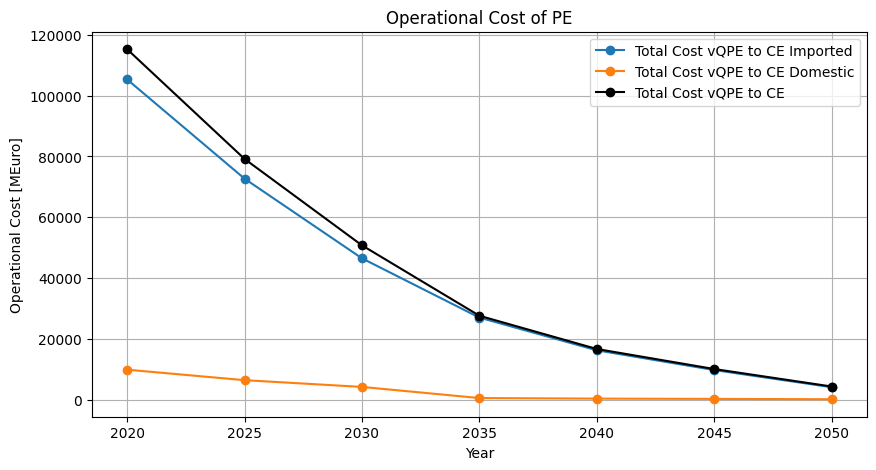

In [19]:
import pandas as pd
pPECost = pd.DataFrame(list(data['pPECost'].items()),columns = ['sPE','pPECost'])
pPECost[['sPE', 'sYear']] = pd.DataFrame(pPECost['sPE'].tolist(), index=pPECost.index)
pPECost = pPECost.set_index('sPE')

TotalCost_vQPEtoCE2020_Imported = (d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2020')].groupby('sPE').sum().vQPEImp)*(pPECost[pPECost.sYear=='y2020'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(1-1)))))
TotalCost_vQPEtoCE2025_Imported = (d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2025')].groupby('sPE').sum().vQPEImp)*(pPECost[pPECost.sYear=='y2025'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(2-1)))))
TotalCost_vQPEtoCE2030_Imported = (d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2030')].groupby('sPE').sum().vQPEImp)*(pPECost[pPECost.sYear=='y2030'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(3-1)))))
TotalCost_vQPEtoCE2035_Imported = (d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2035')].groupby('sPE').sum().vQPEImp)*(pPECost[pPECost.sYear=='y2035'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(4-1)))))
TotalCost_vQPEtoCE2040_Imported = (d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2040')].groupby('sPE').sum().vQPEImp)*(pPECost[pPECost.sYear=='y2040'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(5-1)))))
TotalCost_vQPEtoCE2045_Imported = (d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2045')].groupby('sPE').sum().vQPEImp)*(pPECost[pPECost.sYear=='y2045'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(6-1)))))
TotalCost_vQPEtoCE2050_Imported = (d_vars['vQPEImp'][(d_vars['vQPEImp'].sYear=='y2050')].groupby('sPE').sum().vQPEImp)*(pPECost[pPECost.sYear=='y2050'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(7-1)))))

TotalCost_vQPEtoCE2020_Domestic = (d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2020')].groupby('sPE').sum().vQPEDom)*(pPECost[pPECost.sYear=='y2020'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(1-1)))))
TotalCost_vQPEtoCE2025_Domestic = (d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2025')].groupby('sPE').sum().vQPEDom)*(pPECost[pPECost.sYear=='y2025'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(2-1)))))
TotalCost_vQPEtoCE2030_Domestic = (d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2030')].groupby('sPE').sum().vQPEDom)*(pPECost[pPECost.sYear=='y2030'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(3-1)))))
TotalCost_vQPEtoCE2035_Domestic = (d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2035')].groupby('sPE').sum().vQPEDom)*(pPECost[pPECost.sYear=='y2035'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(4-1)))))
TotalCost_vQPEtoCE2040_Domestic = (d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2040')].groupby('sPE').sum().vQPEDom)*(pPECost[pPECost.sYear=='y2040'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(5-1)))))
TotalCost_vQPEtoCE2045_Domestic = (d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2045')].groupby('sPE').sum().vQPEDom)*(pPECost[pPECost.sYear=='y2045'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(6-1)))))
TotalCost_vQPEtoCE2050_Domestic = (d_vars['vQPEDom'][(d_vars['vQPEDom'].sYear=='y2050')].groupby('sPE').sum().vQPEDom)*(pPECost[pPECost.sYear=='y2050'].pPECost)*(YrGap* (1/((1+DisRate)**(YrGap*(7-1)))))

# Now lets graph the operational costs of PE
years                       = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
TotalCost_vQPEtoCE_Imported = [1e-3*TotalCost_vQPEtoCE2020_Imported.sum(), 1e-3*TotalCost_vQPEtoCE2025_Imported.sum(), 1e-3*TotalCost_vQPEtoCE2030_Imported.sum(),1e-3* TotalCost_vQPEtoCE2035_Imported.sum(), 1e-3*TotalCost_vQPEtoCE2040_Imported.sum(), 1e-3*TotalCost_vQPEtoCE2045_Imported.sum(), 1e-3*TotalCost_vQPEtoCE2050_Imported.sum()]
TotalCost_vQPEtoCE_Domestic = [1e-3*TotalCost_vQPEtoCE2020_Domestic.sum(), 1e-3*TotalCost_vQPEtoCE2025_Domestic.sum(), 1e-3*TotalCost_vQPEtoCE2030_Domestic.sum(),1e-3* TotalCost_vQPEtoCE2035_Domestic.sum(), 1e-3*TotalCost_vQPEtoCE2040_Domestic.sum(), 1e-3*TotalCost_vQPEtoCE2045_Domestic.sum(), 1e-3*TotalCost_vQPEtoCE2050_Domestic.sum()]
TotalCost_vQPEtoCE          = [1e-3*TotalCost_vQPEtoCE2020.sum(), 1e-3*TotalCost_vQPEtoCE2025.sum(), 1e-3*TotalCost_vQPEtoCE2030.sum(),1e-3* TotalCost_vQPEtoCE2035.sum(), 1e-3*TotalCost_vQPEtoCE2040.sum(), 1e-3*TotalCost_vQPEtoCE2045.sum(), 1e-3*TotalCost_vQPEtoCE2050.sum()]

plt.figure(figsize=(10, 5))
plt.plot(years, TotalCost_vQPEtoCE_Imported, marker='o')
plt.plot(years, TotalCost_vQPEtoCE_Domestic, marker='o')
plt.plot(years, TotalCost_vQPEtoCE, 'ko-')
plt.title('Operational Cost of PE')
plt.legend(['Total Cost vQPE to CE Imported', 'Total Cost vQPE to CE Domestic', 'Total Cost vQPE to CE'])
plt.xlabel('Year')
plt.ylabel('Operational Cost [MEuro]')
plt.grid()

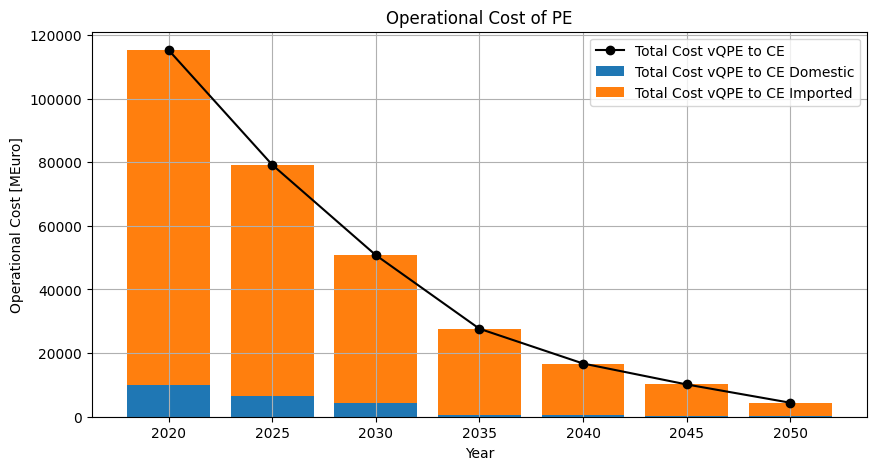

In [20]:
# Use the same data as before but now we will plot the results in a stacked bar plot without the variable TotalCost_vQPEtoCE as a normal plot with a mark o and black color
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 5))
plt.plot(years, TotalCost_vQPEtoCE, 'ko-')
plt.bar(years, TotalCost_vQPEtoCE_Domestic)
plt.bar(years, TotalCost_vQPEtoCE_Imported, bottom=TotalCost_vQPEtoCE_Domestic)
plt.title('Operational Cost of PE')
plt.legend(['Total Cost vQPE to CE','Total Cost vQPE to CE Domestic', 'Total Cost vQPE to CE Imported'])
plt.xlabel('Year')
plt.ylabel('Operational Cost [MEuro]')
plt.grid()

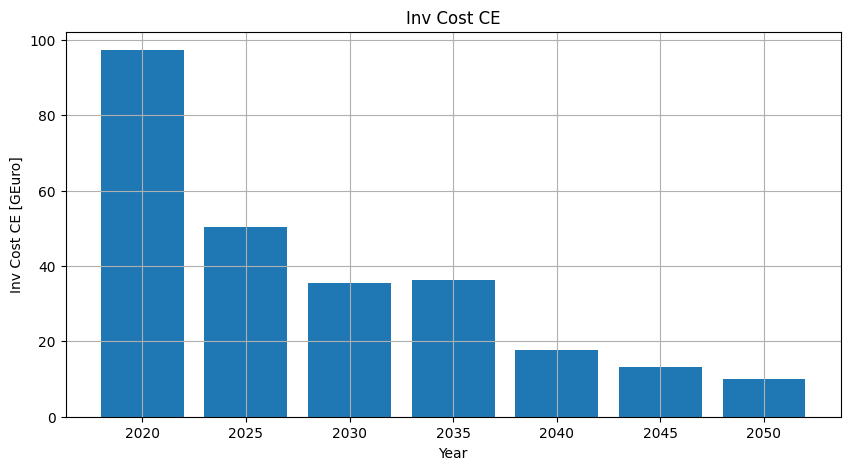

In [21]:
# InvCostCE
y2020invCE=d_vars['vInvCostCE'][(d_vars['vInvCostCE'].sYear=='y2020')].vInvCostCE.sum()
y2025invCE=d_vars['vInvCostCE'][(d_vars['vInvCostCE'].sYear=='y2025')].vInvCostCE.sum()
y2030invCE=d_vars['vInvCostCE'][(d_vars['vInvCostCE'].sYear=='y2030')].vInvCostCE.sum()
y2035invCE=d_vars['vInvCostCE'][(d_vars['vInvCostCE'].sYear=='y2035')].vInvCostCE.sum()
y2040invCE=d_vars['vInvCostCE'][(d_vars['vInvCostCE'].sYear=='y2040')].vInvCostCE.sum()
y2045invCE=d_vars['vInvCostCE'][(d_vars['vInvCostCE'].sYear=='y2045')].vInvCostCE.sum()
y2050invCE=d_vars['vInvCostCE'][(d_vars['vInvCostCE'].sYear=='y2050')].vInvCostCE.sum()

years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
values = [y2020invCE, y2025invCE, y2030invCE, y2035invCE, y2040invCE, y2045invCE, y2050invCE]

plt.figure(figsize=(10, 5))
plt.bar(years, values)
plt.title('Inv Cost CE')
plt.xlabel('Year')
plt.ylabel('Inv Cost CE [GEuro]')
plt.grid()
plt.show()

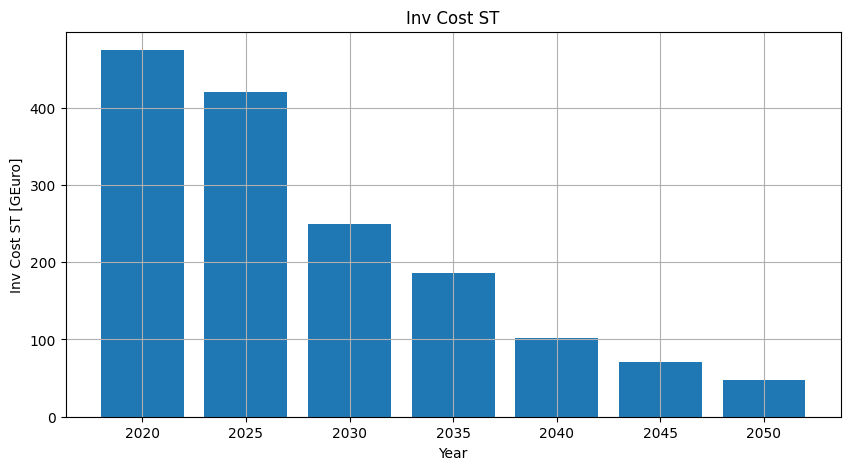

In [22]:
# InvCostST
# Now lets graph the investment costs for supply technologies
y2020invST = d_vars['vInvCostST'][(d_vars['vInvCostST'].sYear=='y2020')].vInvCostST.sum()
y2025invST = d_vars['vInvCostST'][(d_vars['vInvCostST'].sYear=='y2025')].vInvCostST.sum()
y2030invST = d_vars['vInvCostST'][(d_vars['vInvCostST'].sYear=='y2030')].vInvCostST.sum()
y2035invST = d_vars['vInvCostST'][(d_vars['vInvCostST'].sYear=='y2035')].vInvCostST.sum()
y2040invST = d_vars['vInvCostST'][(d_vars['vInvCostST'].sYear=='y2040')].vInvCostST.sum()
y2045invST = d_vars['vInvCostST'][(d_vars['vInvCostST'].sYear=='y2045')].vInvCostST.sum()
y2050invST = d_vars['vInvCostST'][(d_vars['vInvCostST'].sYear=='y2050')].vInvCostST.sum()

years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
values = [y2020invST, y2025invST, y2030invST, y2035invST, y2040invST, y2045invST, y2050invST]

plt.figure(figsize=(10, 5))
plt.bar(years, values)
plt.title('Inv Cost ST')
plt.xlabel('Year')
plt.ylabel('Inv Cost ST [GEuro]')
plt.grid()
plt.show()

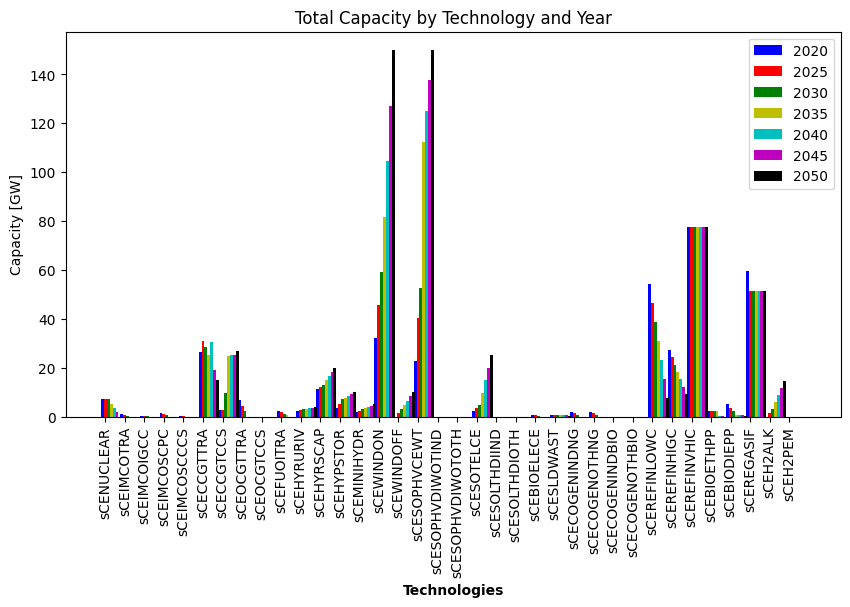

In [23]:
# vTotalCapCE
y2020_TotCap_CE=d_vars['vCETotCap'][d_vars['vCETotCap'].sYear=='y2020']
y2025_TotCap_CE=d_vars['vCETotCap'][d_vars['vCETotCap'].sYear=='y2025']
y2030_TotCap_CE=d_vars['vCETotCap'][d_vars['vCETotCap'].sYear=='y2030']
y2035_TotCap_CE=d_vars['vCETotCap'][d_vars['vCETotCap'].sYear=='y2035']
y2040_TotCap_CE=d_vars['vCETotCap'][d_vars['vCETotCap'].sYear=='y2040']
y2045_TotCap_CE=d_vars['vCETotCap'][d_vars['vCETotCap'].sYear=='y2045']
y2050_TotCap_CE=d_vars['vCETotCap'][d_vars['vCETotCap'].sYear=='y2050']

# Avoid all the variables in sCE that begin with sPE2TE and sTE2TE
y2020_TotCap_CE = y2020_TotCap_CE[~y2020_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2025_TotCap_CE = y2025_TotCap_CE[~y2025_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2030_TotCap_CE = y2030_TotCap_CE[~y2030_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2035_TotCap_CE = y2035_TotCap_CE[~y2035_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2040_TotCap_CE = y2040_TotCap_CE[~y2040_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2045_TotCap_CE = y2045_TotCap_CE[~y2045_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2050_TotCap_CE = y2050_TotCap_CE[~y2050_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2020_TotCap_CE = y2020_TotCap_CE[~y2020_TotCap_CE.sCE.str.startswith('sTE2TE')]
y2025_TotCap_CE = y2025_TotCap_CE[~y2025_TotCap_CE.sCE.str.startswith('sTE2TE')]
y2030_TotCap_CE = y2030_TotCap_CE[~y2030_TotCap_CE.sCE.str.startswith('sTE2TE')]
y2035_TotCap_CE = y2035_TotCap_CE[~y2035_TotCap_CE.sCE.str.startswith('sTE2TE')]
y2040_TotCap_CE = y2040_TotCap_CE[~y2040_TotCap_CE.sCE.str.startswith('sTE2TE')]
y2045_TotCap_CE = y2045_TotCap_CE[~y2045_TotCap_CE.sCE.str.startswith('sTE2TE')]
y2050_TotCap_CE = y2050_TotCap_CE[~y2050_TotCap_CE.sCE.str.startswith('sTE2TE')]



# Delete the column sYear and make the index the column sCE
y2020_TotCap_CE = y2020_TotCap_CE.drop(columns=['sYear']).set_index('sCE')
y2025_TotCap_CE = y2025_TotCap_CE.drop(columns=['sYear']).set_index('sCE')
y2030_TotCap_CE = y2030_TotCap_CE.drop(columns=['sYear']).set_index('sCE')
y2035_TotCap_CE = y2035_TotCap_CE.drop(columns=['sYear']).set_index('sCE')
y2040_TotCap_CE = y2040_TotCap_CE.drop(columns=['sYear']).set_index('sCE')
y2045_TotCap_CE = y2045_TotCap_CE.drop(columns=['sYear']).set_index('sCE')
y2050_TotCap_CE = y2050_TotCap_CE.drop(columns=['sYear']).set_index('sCE')

#graph the results in a bar chart for each technology
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Set the bar width
barWidth = 0.15

# Set the position of the bars on the x-axis
r1 = np.arange(len(y2020_TotCap_CE))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]

# Make the plot
plt.bar(r1, y2020_TotCap_CE.vCETotCap, color='b', width=barWidth, label='2020')
plt.bar(r2, y2025_TotCap_CE.vCETotCap, color='r', width=barWidth, label='2025')
plt.bar(r3, y2030_TotCap_CE.vCETotCap, color='g', width=barWidth, label='2030')
plt.bar(r4, y2035_TotCap_CE.vCETotCap, color='y', width=barWidth, label='2035')
plt.bar(r5, y2040_TotCap_CE.vCETotCap, color='c', width=barWidth, label='2040')
plt.bar(r6, y2045_TotCap_CE.vCETotCap, color='m', width=barWidth, label='2045')
plt.bar(r7, y2050_TotCap_CE.vCETotCap, color='k', width=barWidth, label='2050')

# Add xticks on the middle of the group bars
plt.xlabel('Technologies', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(y2020_TotCap_CE))], y2020_TotCap_CE.index, rotation=90)
plt.ylabel('Capacity [GW]')
plt.title('Total Capacity by Technology and Year')
# Create legend & Show graphic
plt.legend()
plt.show()

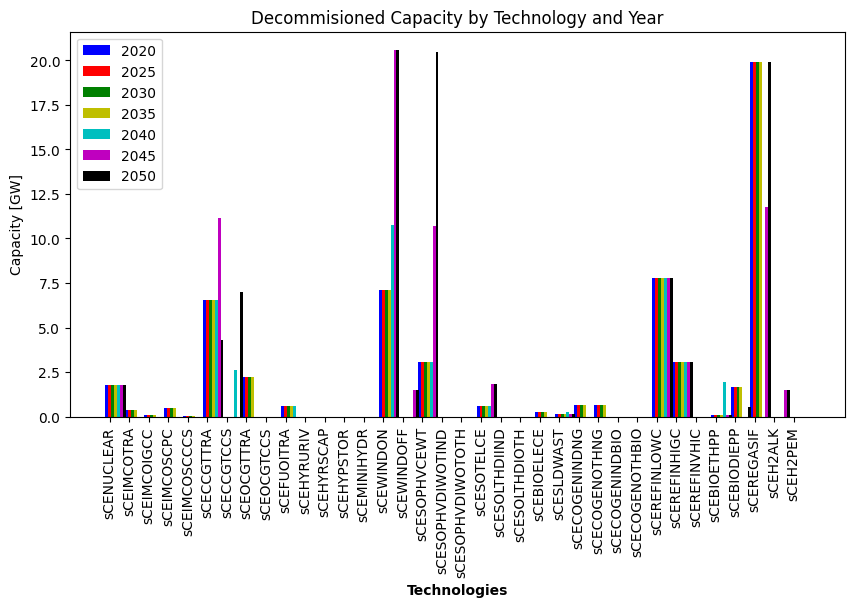

In [24]:
# Decommisioned capcity by technology and year
y2020_TotCap_CE=d_vars['vCEDecCap'][d_vars['vCEDecCap'].sYear=='y2020']
y2025_TotCap_CE=d_vars['vCEDecCap'][d_vars['vCEDecCap'].sYear=='y2025']
y2030_TotCap_CE=d_vars['vCEDecCap'][d_vars['vCEDecCap'].sYear=='y2030']
y2035_TotCap_CE=d_vars['vCEDecCap'][d_vars['vCEDecCap'].sYear=='y2035']
y2040_TotCap_CE=d_vars['vCEDecCap'][d_vars['vCEDecCap'].sYear=='y2040']
y2045_TotCap_CE=d_vars['vCEDecCap'][d_vars['vCEDecCap'].sYear=='y2045']
y2050_TotCap_CE=d_vars['vCEDecCap'][d_vars['vCEDecCap'].sYear=='y2050']

# Avoid all the variables in sCE that begin with sPE2TE and sTE2TE
y2020_TotCap_CE = y2020_TotCap_CE[~y2020_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2025_TotCap_CE = y2025_TotCap_CE[~y2025_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2030_TotCap_CE = y2030_TotCap_CE[~y2030_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2035_TotCap_CE = y2035_TotCap_CE[~y2035_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2040_TotCap_CE = y2040_TotCap_CE[~y2040_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2045_TotCap_CE = y2045_TotCap_CE[~y2045_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2050_TotCap_CE = y2050_TotCap_CE[~y2050_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2020_TotCap_CE = y2020_TotCap_CE[~y2020_TotCap_CE.sCE.str.startswith('sTE2TE')]
y2025_TotCap_CE = y2025_TotCap_CE[~y2025_TotCap_CE.sCE.str.startswith('sTE2TE')]
y2030_TotCap_CE = y2030_TotCap_CE[~y2030_TotCap_CE.sCE.str.startswith('sTE2TE')]
y2035_TotCap_CE = y2035_TotCap_CE[~y2035_TotCap_CE.sCE.str.startswith('sTE2TE')]
y2040_TotCap_CE = y2040_TotCap_CE[~y2040_TotCap_CE.sCE.str.startswith('sTE2TE')]
y2045_TotCap_CE = y2045_TotCap_CE[~y2045_TotCap_CE.sCE.str.startswith('sTE2TE')]
y2050_TotCap_CE = y2050_TotCap_CE[~y2050_TotCap_CE.sCE.str.startswith('sTE2TE')]

# Delete the column sYear and make the index the column sCE
y2020_TotCap_CE = y2020_TotCap_CE.drop(columns=['sYear']).set_index('sCE')
y2025_TotCap_CE = y2025_TotCap_CE.drop(columns=['sYear']).set_index('sCE')
y2030_TotCap_CE = y2030_TotCap_CE.drop(columns=['sYear']).set_index('sCE')
y2035_TotCap_CE = y2035_TotCap_CE.drop(columns=['sYear']).set_index('sCE')
y2040_TotCap_CE = y2040_TotCap_CE.drop(columns=['sYear']).set_index('sCE')
y2045_TotCap_CE = y2045_TotCap_CE.drop(columns=['sYear']).set_index('sCE')
y2050_TotCap_CE = y2050_TotCap_CE.drop(columns=['sYear']).set_index('sCE')

#graph the results in a bar chart for each technology
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Set the bar width
barWidth = 0.15

# Set the position of the bars on the x-axis
r1 = np.arange(len(y2020_TotCap_CE))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]

# Make the plot
plt.bar(r1, y2020_TotCap_CE.vCEDecCap, color='b', width=barWidth, label='2020')
plt.bar(r2, y2025_TotCap_CE.vCEDecCap, color='r', width=barWidth, label='2025')
plt.bar(r3, y2030_TotCap_CE.vCEDecCap, color='g', width=barWidth, label='2030')
plt.bar(r4, y2035_TotCap_CE.vCEDecCap, color='y', width=barWidth, label='2035')
plt.bar(r5, y2040_TotCap_CE.vCEDecCap, color='c', width=barWidth, label='2040')
plt.bar(r6, y2045_TotCap_CE.vCEDecCap, color='m', width=barWidth, label='2045')
plt.bar(r7, y2050_TotCap_CE.vCEDecCap, color='k', width=barWidth, label='2050')

# Add xticks on the middle of the group bars
plt.xlabel('Technologies', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(y2020_TotCap_CE))], y2020_TotCap_CE.index, rotation=90)
plt.ylabel('Capacity [GW]')
plt.title('Decommisioned Capacity by Technology and Year')
# Create legend & Show graphic
plt.legend()
plt.show()


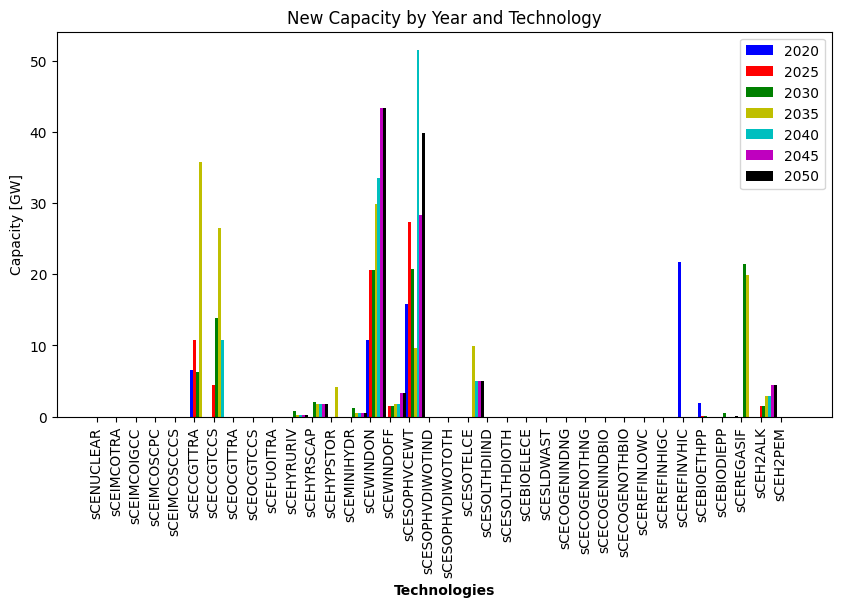

In [17]:
# New capacity installed by technology and year
y2020_TotCap_CE = d_vars['vCENewCap'][d_vars['vCENewCap'].sYear=='y2020']
y2025_TotCap_CE = d_vars['vCENewCap'][d_vars['vCENewCap'].sYear=='y2025']
y2030_TotCap_CE = d_vars['vCENewCap'][d_vars['vCENewCap'].sYear=='y2030']
y2035_TotCap_CE = d_vars['vCENewCap'][d_vars['vCENewCap'].sYear=='y2035']
y2040_TotCap_CE = d_vars['vCENewCap'][d_vars['vCENewCap'].sYear=='y2040']
y2045_TotCap_CE = d_vars['vCENewCap'][d_vars['vCENewCap'].sYear=='y2045']
y2050_TotCap_CE = d_vars['vCENewCap'][d_vars['vCENewCap'].sYear=='y2050']

# Avoid all the variables in sCE that begin with sPE2TE and sTE2TE
y2020_TotCap_CE = y2020_TotCap_CE[~y2020_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2025_TotCap_CE = y2025_TotCap_CE[~y2025_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2030_TotCap_CE = y2030_TotCap_CE[~y2030_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2035_TotCap_CE = y2035_TotCap_CE[~y2035_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2040_TotCap_CE = y2040_TotCap_CE[~y2040_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2045_TotCap_CE = y2045_TotCap_CE[~y2045_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2050_TotCap_CE = y2050_TotCap_CE[~y2050_TotCap_CE.sCE.str.startswith('sPE2TE')]
y2020_TotCap_CE = y2020_TotCap_CE[~y2020_TotCap_CE.sCE.str.startswith('sTE2TE')]
y2025_TotCap_CE = y2025_TotCap_CE[~y2025_TotCap_CE.sCE.str.startswith('sTE2TE')]
y2030_TotCap_CE = y2030_TotCap_CE[~y2030_TotCap_CE.sCE.str.startswith('sTE2TE')]
y2035_TotCap_CE = y2035_TotCap_CE[~y2035_TotCap_CE.sCE.str.startswith('sTE2TE')]
y2040_TotCap_CE = y2040_TotCap_CE[~y2040_TotCap_CE.sCE.str.startswith('sTE2TE')]
y2045_TotCap_CE = y2045_TotCap_CE[~y2045_TotCap_CE.sCE.str.startswith('sTE2TE')]
y2050_TotCap_CE = y2050_TotCap_CE[~y2050_TotCap_CE.sCE.str.startswith('sTE2TE')]

# Delete the column sYear and make the index the column sCE
y2020_TotCap_CE = y2020_TotCap_CE.drop(columns=['sYear']).set_index('sCE')
y2025_TotCap_CE = y2025_TotCap_CE.drop(columns=['sYear']).set_index('sCE')
y2030_TotCap_CE = y2030_TotCap_CE.drop(columns=['sYear']).set_index('sCE')
y2035_TotCap_CE = y2035_TotCap_CE.drop(columns=['sYear']).set_index('sCE')
y2040_TotCap_CE = y2040_TotCap_CE.drop(columns=['sYear']).set_index('sCE')
y2045_TotCap_CE = y2045_TotCap_CE.drop(columns=['sYear']).set_index('sCE')
y2050_TotCap_CE = y2050_TotCap_CE.drop(columns=['sYear']).set_index('sCE')

#graph the results in a bar chart for each technology
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Set the bar width
barWidth = 0.15

# Set the position of the bars on the x-axis
r1 = np.arange(len(y2020_TotCap_CE))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]

# Make the plot
plt.bar(r1, y2020_TotCap_CE.vCENewCap, color='b', width=barWidth, label='2020')
plt.bar(r2, y2025_TotCap_CE.vCENewCap, color='r', width=barWidth, label='2025')
plt.bar(r3, y2030_TotCap_CE.vCENewCap, color='g', width=barWidth, label='2030')
plt.bar(r4, y2035_TotCap_CE.vCENewCap, color='y', width=barWidth, label='2035')
plt.bar(r5, y2040_TotCap_CE.vCENewCap, color='c', width=barWidth, label='2040')
plt.bar(r6, y2045_TotCap_CE.vCENewCap, color='m', width=barWidth, label='2045')
plt.bar(r7, y2050_TotCap_CE.vCENewCap, color='k', width=barWidth, label='2050')

# Add xticks on the middle of the group bars
plt.xlabel('Technologies', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(y2020_TotCap_CE))], y2020_TotCap_CE.index, rotation=90)
plt.ylabel('Capacity [GW]')
plt.title('New Capacity by Year and Technology')
# Create legend & Show graphic
plt.legend()
plt.show()

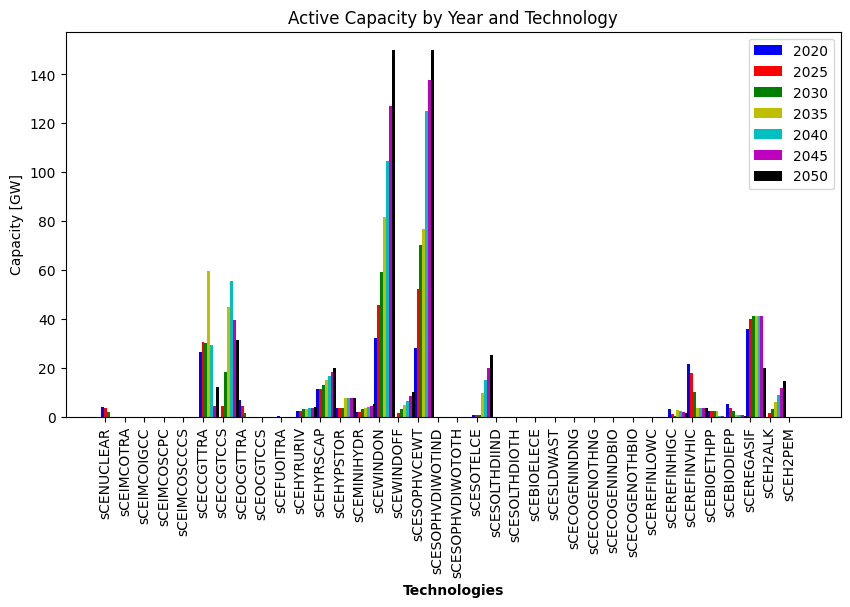

In [18]:
# Active capacity by technology and year
y2020_TotActCap_CE = d_vars['vCEActCap'][d_vars['vCEActCap'].sYear=='y2020']
y2025_TotActCap_CE = d_vars['vCEActCap'][d_vars['vCEActCap'].sYear=='y2025']
y2030_TotActCap_CE = d_vars['vCEActCap'][d_vars['vCEActCap'].sYear=='y2030']
y2035_TotActCap_CE = d_vars['vCEActCap'][d_vars['vCEActCap'].sYear=='y2035']
y2040_TotActCap_CE = d_vars['vCEActCap'][d_vars['vCEActCap'].sYear=='y2040']
y2045_TotActCap_CE = d_vars['vCEActCap'][d_vars['vCEActCap'].sYear=='y2045']
y2050_TotActCap_CE = d_vars['vCEActCap'][d_vars['vCEActCap'].sYear=='y2050']

# Avoid all the variables in sCE that begin with sPE2TE and sTE2TE
y2020_TotActCap_CE = y2020_TotActCap_CE[~y2020_TotActCap_CE.sCE.str.startswith('sPE2TE')]
y2025_TotActCap_CE = y2025_TotActCap_CE[~y2025_TotActCap_CE.sCE.str.startswith('sPE2TE')]
y2030_TotActCap_CE = y2030_TotActCap_CE[~y2030_TotActCap_CE.sCE.str.startswith('sPE2TE')]
y2035_TotActCap_CE = y2035_TotActCap_CE[~y2035_TotActCap_CE.sCE.str.startswith('sPE2TE')]
y2040_TotActCap_CE = y2040_TotActCap_CE[~y2040_TotActCap_CE.sCE.str.startswith('sPE2TE')]
y2045_TotActCap_CE = y2045_TotActCap_CE[~y2045_TotActCap_CE.sCE.str.startswith('sPE2TE')]
y2050_TotActCap_CE = y2050_TotActCap_CE[~y2050_TotActCap_CE.sCE.str.startswith('sPE2TE')]
y2020_TotActCap_CE = y2020_TotActCap_CE[~y2020_TotActCap_CE.sCE.str.startswith('sTE2TE')]
y2025_TotActCap_CE = y2025_TotActCap_CE[~y2025_TotActCap_CE.sCE.str.startswith('sTE2TE')]
y2030_TotActCap_CE = y2030_TotActCap_CE[~y2030_TotActCap_CE.sCE.str.startswith('sTE2TE')]
y2035_TotActCap_CE = y2035_TotActCap_CE[~y2035_TotActCap_CE.sCE.str.startswith('sTE2TE')]
y2040_TotActCap_CE = y2040_TotActCap_CE[~y2040_TotActCap_CE.sCE.str.startswith('sTE2TE')]
y2045_TotActCap_CE = y2045_TotActCap_CE[~y2045_TotActCap_CE.sCE.str.startswith('sTE2TE')]
y2050_TotActCap_CE = y2050_TotActCap_CE[~y2050_TotActCap_CE.sCE.str.startswith('sTE2TE')]

# Delete the column sYear and make the index the column sCE
y2020_TotActCap_CE = y2020_TotActCap_CE.drop(columns=['sYear']).set_index('sCE')
y2025_TotActCap_CE = y2025_TotActCap_CE.drop(columns=['sYear']).set_index('sCE')
y2030_TotActCap_CE = y2030_TotActCap_CE.drop(columns=['sYear']).set_index('sCE')
y2035_TotActCap_CE = y2035_TotActCap_CE.drop(columns=['sYear']).set_index('sCE')
y2040_TotActCap_CE = y2040_TotActCap_CE.drop(columns=['sYear']).set_index('sCE')
y2045_TotActCap_CE = y2045_TotActCap_CE.drop(columns=['sYear']).set_index('sCE')
y2050_TotActCap_CE = y2050_TotActCap_CE.drop(columns=['sYear']).set_index('sCE')

#graph the results in a bar chart for each technology
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Set the bar width
barWidth = 0.15

# Set the position of the bars on the x-axis
r1 = np.arange(len(y2020_TotActCap_CE))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]

# Make the plot
plt.bar(r1, y2020_TotActCap_CE.vCEActCap, color='b', width=barWidth, label='2020')
plt.bar(r2, y2025_TotActCap_CE.vCEActCap, color='r', width=barWidth, label='2025')
plt.bar(r3, y2030_TotActCap_CE.vCEActCap, color='g', width=barWidth, label='2030')
plt.bar(r4, y2035_TotActCap_CE.vCEActCap, color='y', width=barWidth, label='2035')
plt.bar(r5, y2040_TotActCap_CE.vCEActCap, color='c', width=barWidth, label='2040')
plt.bar(r6, y2045_TotActCap_CE.vCEActCap, color='m', width=barWidth, label='2045')
plt.bar(r7, y2050_TotActCap_CE.vCEActCap, color='k', width=barWidth, label='2050')

# Add xticks on the middle of the group bars
plt.xlabel('Technologies', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(y2020_TotActCap_CE))], y2020_TotActCap_CE.index, rotation=90)
plt.ylabel('Capacity [GW]')
plt.title('Active Capacity by Year and Technology')
# Create legend & Show graphic
plt.legend()
plt.show()

In [27]:
# Lets define a dataset with the characteristics of each CE technology
# The dataset NAMED CE TECHNOLOGIES will contain the following columns:
# - sCE: Name of the technology
# - sYear: Year of the data
# - vInvCostCE: Investment cost of the technology
# - vCENewCap: New capacity of the technology
# - vCETotCap: Total capacity of the technology
# - vCEDecCap: Decomissioned capacity of the technology
# - vCEActCap: Actual capacity of the technology
# - vCEHibCap: Hibernated capacity of the technology
# - vCEDeltaActCap: Change in actual capacity of the technology
# - vEmiCO2CE: CO2 emissions of the technology
# - vEmiSOxCE: SOx emissions of the technology
# - vEmiPM25CE: PM2.5 emissions of the technology

# Create the dataset
import pandas as pd
CE_TECHNOLOGIES = pd.DataFrame(columns=['sCE', 'sYear', 'vCETotCap', 'vCENewCap', 'vCEDecCap', 'vCEActCap', 'vCEHibCap','vInvCostCE' ,'vCEDeltaActCap', 'vEmiCO2CE', 'vEmiSOxCE', 'vEmiPM25CE'])

# Fill the dataset with the data
CE_TECHNOLOGIES['sCE'] = d_vars['vInvCostCE'].sCE
CE_TECHNOLOGIES['sYear'] = d_vars['vInvCostCE'].sYear
CE_TECHNOLOGIES['vCETotCap'] = d_vars['vCETotCap'].vCETotCap
CE_TECHNOLOGIES['vCENewCap'] = d_vars['vCENewCap'].vCENewCap
CE_TECHNOLOGIES['vCEDecCap'] = d_vars['vCEDecCap'].vCEDecCap
CE_TECHNOLOGIES['vCEActCap'] = d_vars['vCEActCap'].vCEActCap
CE_TECHNOLOGIES['vCEHibCap'] = d_vars['vCEHibCap'].vCEHibCap
CE_TECHNOLOGIES['vInvCostCE'] = d_vars['vInvCostCE'].vInvCostCE
CE_TECHNOLOGIES['vCEDeltaActCap'] = d_vars['vCEDeltaActCap'].vCEDeltaActCap
CE_TECHNOLOGIES['vEmiCO2CE'] = d_vars['vEmiCO2CE'].vEmiCO2CE
CE_TECHNOLOGIES['vEmiSOxCE'] = d_vars['vEmiSOxCE'].vEmiSOxCE
CE_TECHNOLOGIES['vEmiPM25CE'] = d_vars['vEmiPM25CE'].vEmiPM25CE

# Lets extract the data for the technology 'sCENUCLEAR' and visualize the results
CE_TECHNOLOGIES[CE_TECHNOLOGIES['sCE']=='sCESOPHVCEWT']


,sCE,sYear,vCETotCap,vCENewCap,vCEDecCap,vCEActCap,vCEHibCap,vInvCostCE,vCEDeltaActCap,vEmiCO2CE,vEmiSOxCE,vEmiPM25CE
112,sCESOPHVCEWT,y2020,22.920679,10.705479,3.053800,22.920679,0.0,5.098028,0.0,0.0,0.0,0.0
113,sCESOPHVCEWT,y2025,40.355850,20.488972,3.053800,40.355850,0.0,6.257400,0.0,0.0,0.0,0.0
114,sCESOPHVCEWT,y2030,52.664128,15.362078,3.053800,52.664128,0.0,3.064182,0.0,0.0,0.0,0.0
115,sCESOPHVCEWT,y2035,112.500000,62.889672,3.053800,112.500000,0.0,8.032793,0.0,0.0,0.0,0.0
116,sCESOPHVCEWT,y2040,125.000000,15.553800,3.053800,125.000000,0.0,1.310182,0.0,0.0,0.0,0.0
117,sCESOPHVCEWT,y2045,137.500000,23.205479,10.705479,137.500000,0.0,1.303455,0.0,0.0,0.0,0.0
118,sCESOPHVCEWT,y2050,150.000000,32.988972,20.488972,150.000000,0.0,1.222711,0.0,0.0,0.0,0.0


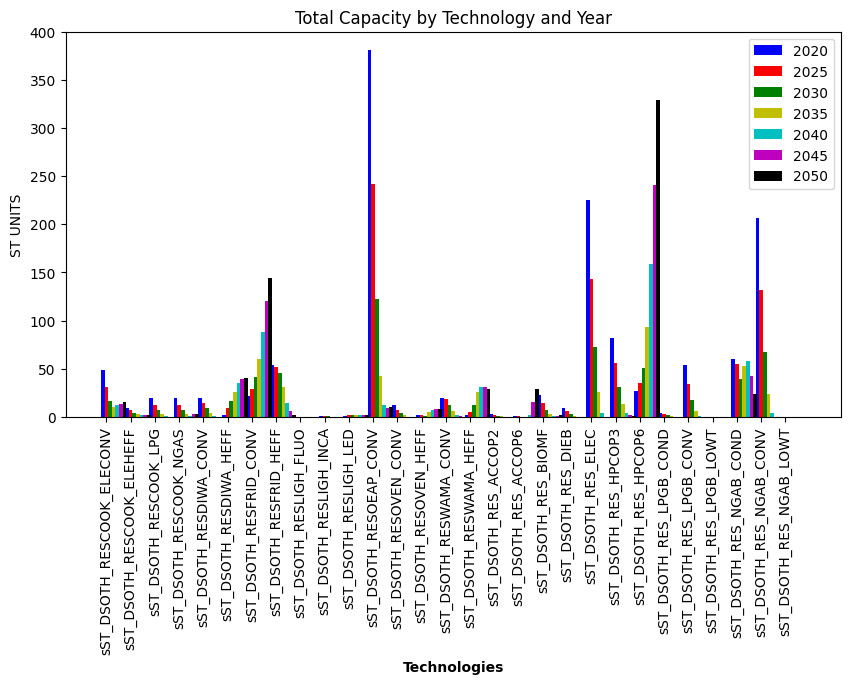

In [19]:
# vTotalCapST
y2020_TotCap_ST = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2020') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTTotCap
y2025_TotCap_ST = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2025') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTTotCap
y2030_TotCap_ST = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2030') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTTotCap
y2035_TotCap_ST = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2035') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTTotCap
y2040_TotCap_ST = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2040') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTTotCap
y2045_TotCap_ST = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2045') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTTotCap
y2050_TotCap_ST = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2050') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSOTH_RES'))].groupby('sST').sum().vSTTotCap

# Graph the results in a bar chart for each technology
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 1, figsize=(10, 5))

# Set the bar width
barWidth = 0.15

# Set the position of the bars on the x-axis
r1 = np.arange(len(y2020_TotCap_ST))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]

# Make the plot
plt.bar(r1, y2020_TotCap_ST, color='b', width=barWidth, label='2020')
plt.bar(r2, y2025_TotCap_ST, color='r', width=barWidth, label='2025')
plt.bar(r3, y2030_TotCap_ST, color='g', width=barWidth, label='2030')
plt.bar(r4, y2035_TotCap_ST, color='y', width=barWidth, label='2035')
plt.bar(r5, y2040_TotCap_ST, color='c', width=barWidth, label='2040')
plt.bar(r6, y2045_TotCap_ST, color='m', width=barWidth, label='2045')
plt.bar(r7, y2050_TotCap_ST, color='k', width=barWidth, label='2050')

# Add xticks on the middle of the group bars
plt.xlabel('Technologies', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(y2020_TotCap_ST))], y2020_TotCap_ST.index, rotation=90)
plt.ylabel('ST UNITS')
plt.title('Total Capacity by Technology and Year')
# Create legend & Show graphic
plt.legend()
plt.show()

In [42]:
# Lets define a dataset with the characteristics of each CE technology
# The dataset NAMED CE TECHNOLOGIES will contain the following columns:
# - sTE: Name of the technology
# - sYear: Year of the data
# - vInvCostST: Investment cost of the technology
# - vSTNewCap: New capacity of the technology
# - vSTTotCap: Total capacity of the technology
# - vSTDecCap: Decomissioned capacity of the technology
# - vEmiCO2ST: CO2 emissions of the technology
# - vEmiSOxST: SOx emissions of the technology
# - vEmiPM25ST: PM2.5 emissions of the technology

# # Create the dataset
# import pandas as pd
ST_TECHNOLOGIES = pd.DataFrame(columns=['sST', 'sYear', 'vSTTotCap', 'vSTNewCap', 'vSTDecCap', 'vInvCostST' , 'vEmiCO2ST', 'vEmiSOxST', 'vEmiPM25ST'])

# # Fill the dataset with the data
# ST_TECHNOLOGIES['sST']          = pd.DataFrame(d_vars['vSTTotCap'][d_vars['vSTTotCap'].sST.str.startswith('sST_DSOTH_RES')].groupby('sST').sum().vSTTotCap).index
# ST_TECHNOLOGIES['sYear']        = d_vars['vInvCostST'].sYear
ST_TECHNOLOGIES    = pd.DataFrame(d_vars['vSTTotCap'][d_vars['vSTTotCap'].sST.str.startswith('sST_DSOTH_RES')].groupby('sST').sum().vSTTotCap)
# ST_TECHNOLOGIES['vSTNewCap']    = d_vars['vSTNewCap'].vSTNewCap
# ST_TECHNOLOGIES['vSTDecCap']    = d_vars['vSTDecCap'].vSTDecCap
# ST_TECHNOLOGIES['vInvCostST']   = d_vars['vInvCostST'].vInvCostST
# ST_TECHNOLOGIES['vEmiCO2ST']    = d_vars['vEmiCO2ST'].vEmiCO2ST
# ST_TECHNOLOGIES['vEmiSOxST']    = d_vars['vEmiSOxST'].vEmiSOxST
# ST_TECHNOLOGIES['vEmiPM25ST']   = d_vars['vEmiPM25ST'].vEmiPM25ST


# # Lets extract the data for the technology 'sCENUCLEAR' and visualize the results
# ST_TECHNOLOGIES[ST_TECHNOLOGIES['sST']=='sST_DSOTH_RES_DIEB']

In [32]:
pd.DataFrame(d_vars['vSTTotCap'][d_vars['vSTTotCap'].sST.str.startswith('sST_DSOTH_RES')].groupby('sST').sum().vSTTotCap).vSTTotCap

sST
sST_DSOTH_RESCOOK_ELECONV    101.411742
sST_DSOTH_RESCOOK_ELEHEFF     66.007425
sST_DSOTH_RESCOOK_LPG         41.188034
sST_DSOTH_RESCOOK_NGAS        46.450856
sST_DSOTH_RESDIWA_CONV        73.116421
sST_DSOTH_RESDIWA_HEFF       107.298655
sST_DSOTH_RESFRID_CONV       619.191385
sST_DSOTH_RESFRID_HEFF         4.768800
sST_DSOTH_RESLIGH_FLUO         0.065644
sST_DSOTH_RESLIGH_INCA         1.085651
sST_DSOTH_RESLIGH_LED          3.078137
sST_DSOTH_RESOEAP_CONV       815.806139
sST_DSOTH_RESOVEN_CONV        24.698961
sST_DSOTH_RESOVEN_HEFF        24.095402
sST_DSOTH_RESWAMA_CONV       109.831829
sST_DSOTH_RESWAMA_HEFF        70.583248
sST_DSOTH_RES_ACCOP2           5.184970
sST_DSOTH_RES_ACCOP6           1.241065
sST_DSOTH_RES_BIOMF           50.206309
sST_DSOTH_RES_DIEB            18.876373
sST_DSOTH_RES_ELEC           470.967501
sST_DSOTH_RES_HPCOP3         171.245986
sST_DSOTH_RES_HPCOP6         702.233629
sST_DSOTH_RES_LPGB_COND        9.109665
sST_DSOTH_RES_LPGB_CONV      113.258

In [33]:
d_vars['vSTTotCap'].groupby('sST').sum().vSTTotCap

sST
sST_DSIND_CHE             23.406534
sST_DSIND_CON              7.000000
sST_DSIND_FBT              7.000000
sST_DSIND_IIS             24.120053
sST_DSIND_MAC              7.000000
                            ...    
sST_DSTRA_RAIL_INTER      15.550739
sST_DSTRA_RAIL_URBAN      56.787067
sST_DSTRA_SEAF_SHIPDIE     0.054046
sST_DSTRA_SEA_SHIPDIE      0.007481
sST_DSTRA_SEA_SHIPFOI      0.112212
Name: vSTTotCap, Length: 87, dtype: float64

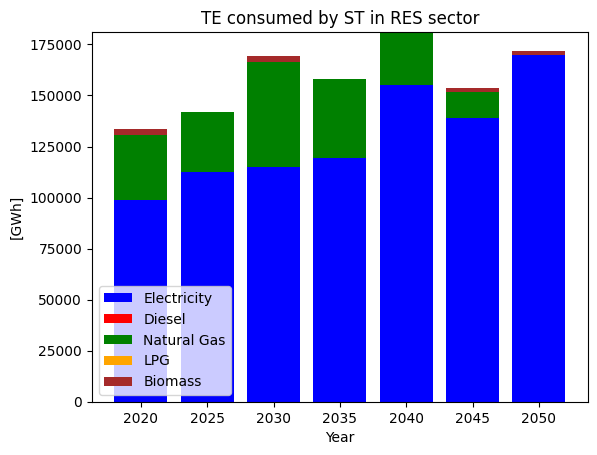

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

y2020_sTEELE_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEELE')) & (d_vars['vQSTInTE'].sYear=='y2020') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2025_sTEELE_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEELE')) & (d_vars['vQSTInTE'].sYear=='y2025') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2030_sTEELE_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEELE')) & (d_vars['vQSTInTE'].sYear=='y2030') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2035_sTEELE_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEELE')) & (d_vars['vQSTInTE'].sYear=='y2035') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2040_sTEELE_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEELE')) & (d_vars['vQSTInTE'].sYear=='y2040') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2045_sTEELE_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEELE')) & (d_vars['vQSTInTE'].sYear=='y2045') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2050_sTEELE_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEELE')) & (d_vars['vQSTInTE'].sYear=='y2050') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()

y2020_sTEOPDIE_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (d_vars['vQSTInTE'].sYear=='y2020') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2025_sTEOPDIE_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (d_vars['vQSTInTE'].sYear=='y2025') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2030_sTEOPDIE_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (d_vars['vQSTInTE'].sYear=='y2030') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2035_sTEOPDIE_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (d_vars['vQSTInTE'].sYear=='y2035') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2040_sTEOPDIE_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (d_vars['vQSTInTE'].sYear=='y2040') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2045_sTEOPDIE_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (d_vars['vQSTInTE'].sYear=='y2045') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2050_sTEOPDIE_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (d_vars['vQSTInTE'].sYear=='y2050') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()

y2020_sTENAGAS_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (d_vars['vQSTInTE'].sYear=='y2020') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2025_sTENAGAS_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (d_vars['vQSTInTE'].sYear=='y2025') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2030_sTENAGAS_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (d_vars['vQSTInTE'].sYear=='y2030') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2035_sTENAGAS_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (d_vars['vQSTInTE'].sYear=='y2035') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2040_sTENAGAS_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (d_vars['vQSTInTE'].sYear=='y2040') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2045_sTENAGAS_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (d_vars['vQSTInTE'].sYear=='y2045') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2050_sTENAGAS_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (d_vars['vQSTInTE'].sYear=='y2050') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()

y2020_sTEOLPG_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOLPG')) & (d_vars['vQSTInTE'].sYear=='y2020') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2025_sTEOLPG_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOLPG')) & (d_vars['vQSTInTE'].sYear=='y2025') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2030_sTEOLPG_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOLPG')) & (d_vars['vQSTInTE'].sYear=='y2030') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2035_sTEOLPG_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOLPG')) & (d_vars['vQSTInTE'].sYear=='y2035') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2040_sTEOLPG_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOLPG')) & (d_vars['vQSTInTE'].sYear=='y2040') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2045_sTEOLPG_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOLPG')) & (d_vars['vQSTInTE'].sYear=='y2045') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2050_sTEOLPG_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOLPG')) & (d_vars['vQSTInTE'].sYear=='y2050') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()

y2020_sTEBIOMA_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (d_vars['vQSTInTE'].sYear=='y2020') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2025_sTEBIOMA_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (d_vars['vQSTInTE'].sYear=='y2025') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2030_sTEBIOMA_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (d_vars['vQSTInTE'].sYear=='y2030') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2035_sTEBIOMA_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (d_vars['vQSTInTE'].sYear=='y2035') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2040_sTEBIOMA_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (d_vars['vQSTInTE'].sYear=='y2040') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2045_sTEBIOMA_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (d_vars['vQSTInTE'].sYear=='y2045') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()
y2050_sTEBIOMA_RES = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIOMA')) & (d_vars['vQSTInTE'].sYear=='y2050') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSOTH_RES'))].vQSTInTE.sum()

# Graph bar stackplot
years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
sTEELE_RES = [y2020_sTEELE_RES, y2025_sTEELE_RES, y2030_sTEELE_RES, y2035_sTEELE_RES, y2040_sTEELE_RES, y2045_sTEELE_RES, y2050_sTEELE_RES]
sTEOPDIE_RES = [y2020_sTEOPDIE_RES, y2025_sTEOPDIE_RES, y2030_sTEOPDIE_RES, y2035_sTEOPDIE_RES, y2040_sTEOPDIE_RES, y2045_sTEOPDIE_RES, y2050_sTEOPDIE_RES]
sTENAGAS_RES = [y2020_sTENAGAS_RES, y2025_sTENAGAS_RES, y2030_sTENAGAS_RES, y2035_sTENAGAS_RES, y2040_sTENAGAS_RES, y2045_sTENAGAS_RES, y2050_sTENAGAS_RES]
sTEOLPG_RES = [y2020_sTEOLPG_RES, y2025_sTEOLPG_RES, y2030_sTEOLPG_RES, y2035_sTEOLPG_RES, y2040_sTEOLPG_RES, y2045_sTEOLPG_RES, y2050_sTEOLPG_RES]
sTEBIOMA_RES = [y2020_sTEBIOMA_RES, y2025_sTEBIOMA_RES, y2030_sTEBIOMA_RES, y2035_sTEBIOMA_RES, y2040_sTEBIOMA_RES, y2045_sTEBIOMA_RES, y2050_sTEBIOMA_RES]

plt.bar(years, sTEELE_RES, label='Electricity', color='blue')
plt.bar(years, sTEOPDIE_RES, label='Diesel', color='red', bottom=sTEELE_RES)
plt.bar(years, sTENAGAS_RES, label='Natural Gas', color='green', bottom=[sum(x) for x in zip(sTEELE_RES, sTEOPDIE_RES)])
plt.bar(years, sTEOLPG_RES, label='LPG', color='orange', bottom=[sum(x) for x in zip(sTEELE_RES, sTEOPDIE_RES, sTENAGAS_RES)])
plt.bar(years, sTEBIOMA_RES, label='Biomass', color='brown', bottom=[sum(x) for x in zip(sTEELE_RES, sTEOPDIE_RES, sTENAGAS_RES, sTEOLPG_RES)])
plt.title('TE consumed by ST in RES sector')
plt.xlabel('Year')
plt.ylabel('[GWh]')
plt.legend()
plt.show()

C:\Users\marios\AppData\Local\Temp\ipykernel_25612\1076502512.py:50: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  y2025gasCE_TEELECE = d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCECCGTTRA')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2025')].vQCESecOUT.sum() + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCECCGTCCS')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2025')].vQCESecOUT.sum()  + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEOCGTTRA')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2025')].vQCESecOUT.sum() + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEOCGTCCS')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2025')].vQCESecOUT.sum()
C:\Users\marios\AppData\Local\Temp\ipykernel_25612\1076502512

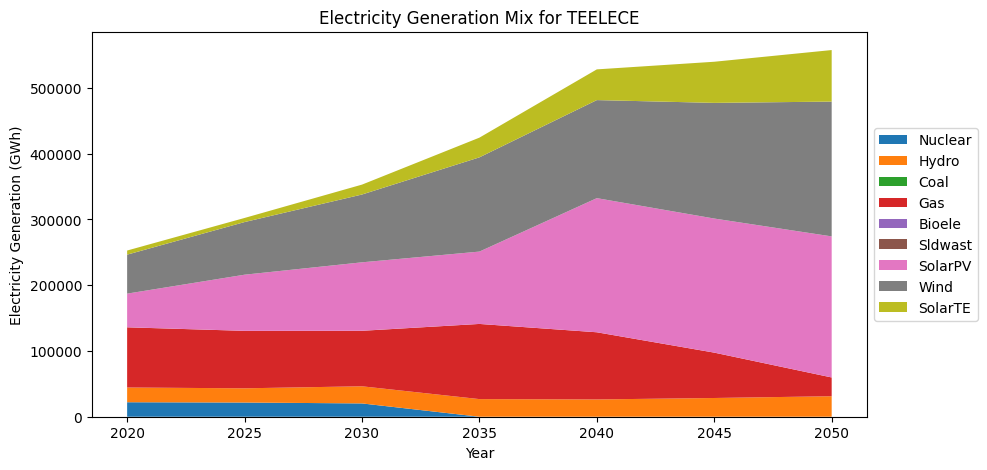

In [17]:
y2020_Nuclear_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCENUCLEAR')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum()
y2025_Nuclear_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCENUCLEAR')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum()
y2030_Nuclear_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCENUCLEAR')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum()
y2035_Nuclear_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCENUCLEAR')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum()
y2040_Nuclear_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCENUCLEAR')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum()
y2045_Nuclear_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCENUCLEAR')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum()
y2050_Nuclear_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCENUCLEAR')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum()

y2020_solarPV_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESOPHVCEWT')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum()
y2025_solarPV_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESOPHVCEWT')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum()
y2030_solarPV_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESOPHVCEWT')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum()
y2035_solarPV_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESOPHVCEWT')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum()
y2040_solarPV_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESOPHVCEWT')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum()
y2045_solarPV_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESOPHVCEWT')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum()
y2050_solarPV_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESOPHVCEWT')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum()

y2020solarTELC_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESOTELCE')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum()
y2025solarTELC_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESOTELCE')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum()
y2030solarTELC_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESOTELCE')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum()
y2035solarTELC_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESOTELCE')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum()
y2040solarTELC_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESOTELCE')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum()
y2045solarTELC_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESOTELCE')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum()
y2050solarTELC_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESOTELCE')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum()

y2020_wind_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEWINDON')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum()
y2025_wind_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEWINDON')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum()
y2030_wind_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEWINDON')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum()
y2035_wind_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEWINDON')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum()
y2040_wind_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEWINDON')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum()
y2045_wind_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEWINDON')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum()
y2050_wind_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEWINDON')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum()

y2020hydro_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEHYRURIV')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEHYRSCAP')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEMINIHYDR')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum()+ d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEHYPSTOR')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2020')].vQCESecOUT.sum()
y2025hydro_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEHYRURIV')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEHYRSCAP')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEMINIHYDR')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum()+ d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEHYPSTOR')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2025')].vQCESecOUT.sum()
y2030hydro_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEHYRURIV')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEHYRSCAP')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEMINIHYDR')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum()+ d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEHYPSTOR')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2030')].vQCESecOUT.sum()
y2035hydro_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEHYRURIV')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEHYRSCAP')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEMINIHYDR')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum()+ d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEHYPSTOR')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2035')].vQCESecOUT.sum()
y2040hydro_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEHYRURIV')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEHYRSCAP')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEMINIHYDR')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum()+ d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEHYPSTOR')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2040')].vQCESecOUT.sum()
y2045hydro_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEHYRURIV')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEHYRSCAP')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEMINIHYDR')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum()+ d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEHYPSTOR')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2045')].vQCESecOUT.sum()
y2050hydro_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEHYRURIV')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEHYRSCAP')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEMINIHYDR')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum()+ d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEHYPSTOR')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2050')].vQCESecOUT.sum()

y2020coalCE_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOTRA')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOIGCC')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCPC')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCCCS')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum()
y2025coalCE_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOTRA')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOIGCC')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCPC')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCCCS')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum()
y2030coalCE_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOTRA')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOIGCC')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCPC')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCCCS')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum()
y2035coalCE_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOTRA')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOIGCC')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCPC')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCCCS')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum()
y2040coalCE_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOTRA')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOIGCC')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCPC')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCCCS')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum()
y2045coalCE_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOTRA')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOIGCC')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCPC')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCCCS')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum()
y2050coalCE_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOTRA')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOIGCC')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCPC')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum() + d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEIMCOSCCCS')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum()

y2020gasCE_TEELECE = d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCECCGTTRA')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2020')].vQCESecOUT.sum() + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCECCGTCCS')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2020')].vQCESecOUT.sum()  + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEOCGTTRA')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2020')].vQCESecOUT.sum() + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEOCGTCCS')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2020')].vQCESecOUT.sum()
y2025gasCE_TEELECE = d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCECCGTTRA')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2025')].vQCESecOUT.sum() + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCECCGTCCS')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2025')].vQCESecOUT.sum()  + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEOCGTTRA')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2025')].vQCESecOUT.sum() + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEOCGTCCS')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2025')].vQCESecOUT.sum()
y2030gasCE_TEELECE = d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCECCGTTRA')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2030')].vQCESecOUT.sum() + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCECCGTCCS')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2030')].vQCESecOUT.sum()  + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEOCGTTRA')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2030')].vQCESecOUT.sum() + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEOCGTCCS')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2030')].vQCESecOUT.sum()
y2035gasCE_TEELECE = d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCECCGTTRA')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2035')].vQCESecOUT.sum() + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCECCGTCCS')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2035')].vQCESecOUT.sum()  + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEOCGTTRA')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2035')].vQCESecOUT.sum() + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEOCGTCCS')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2035')].vQCESecOUT.sum()
y2040gasCE_TEELECE = d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCECCGTTRA')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2040')].vQCESecOUT.sum() + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCECCGTCCS')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2040')].vQCESecOUT.sum()  + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEOCGTTRA')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2040')].vQCESecOUT.sum() + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEOCGTCCS')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2040')].vQCESecOUT.sum()
y2045gasCE_TEELECE = d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCECCGTTRA')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2045')].vQCESecOUT.sum() + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCECCGTCCS')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2045')].vQCESecOUT.sum()  + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEOCGTTRA')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2045')].vQCESecOUT.sum() + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEOCGTCCS')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2045')].vQCESecOUT.sum()
y2050gasCE_TEELECE = d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCECCGTTRA')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2050')].vQCESecOUT.sum() + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCECCGTCCS')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2050')].vQCESecOUT.sum()  + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEOCGTTRA')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCESecOUT'].sYear=='y2050')].vQCESecOUT.sum() + d_vars['vQCESecOUT'][(d_vars['vQCESecOUT'].sCE.str.startswith('sCEOCGTCCS')) & (d_vars['vQCESecOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2050')].vQCESecOUT.sum()


y2020bioeleCE_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEBIOELECE')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum()
y2025bioeleCE_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEBIOELECE')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum()
y2030bioeleCE_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEBIOELECE')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum()
y2035bioeleCE_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEBIOELECE')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum()
y2040bioeleCE_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEBIOELECE')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum()
y2045bioeleCE_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEBIOELECE')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum()
y2050bioeleCE_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCEBIOELECE')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum()

y2020sldwast_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESLDWAST')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2020')].vQCEPriOUT.sum()
y2025sldwast_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESLDWAST')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2025')].vQCEPriOUT.sum()
y2030sldwast_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESLDWAST')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2030')].vQCEPriOUT.sum()
y2035sldwast_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESLDWAST')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2035')].vQCEPriOUT.sum()
y2040sldwast_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESLDWAST')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2040')].vQCEPriOUT.sum()
y2045sldwast_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESLDWAST')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2045')].vQCEPriOUT.sum()
y2050sldwast_TEELECE = d_vars['vQCEPriOUT'][(d_vars['vQCEPriOUT'].sCE.str.startswith('sCESLDWAST')) & (d_vars['vQCEPriOUT'].sTE.str.startswith('sTEELECE')) & (d_vars['vQCEPriOUT'].sYear=='y2050')].vQCEPriOUT.sum()

# Graph
years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
Nuclear_TEELECE = [y2020_Nuclear_TEELECE, y2025_Nuclear_TEELECE, y2030_Nuclear_TEELECE, y2035_Nuclear_TEELECE, y2040_Nuclear_TEELECE, y2045_Nuclear_TEELECE, y2050_Nuclear_TEELECE]
Hydro_TEELECE = [y2020hydro_TEELECE, y2025hydro_TEELECE, y2030hydro_TEELECE, y2035hydro_TEELECE, y2040hydro_TEELECE, y2045hydro_TEELECE, y2050hydro_TEELECE]
Coal_TEELECE = [y2020coalCE_TEELECE, y2025coalCE_TEELECE, y2030coalCE_TEELECE, y2035coalCE_TEELECE, y2040coalCE_TEELECE, y2045coalCE_TEELECE, y2050coalCE_TEELECE]
Gas_TEELECE = [y2020gasCE_TEELECE, y2025gasCE_TEELECE, y2030gasCE_TEELECE, y2035gasCE_TEELECE, y2040gasCE_TEELECE, y2045gasCE_TEELECE, y2050gasCE_TEELECE]
Bioele_TEELECE = [y2020bioeleCE_TEELECE, y2025bioeleCE_TEELECE, y2030bioeleCE_TEELECE, y2035bioeleCE_TEELECE, y2040bioeleCE_TEELECE, y2045bioeleCE_TEELECE, y2050bioeleCE_TEELECE]
Sldwast_TEELECE = [y2020sldwast_TEELECE, y2025sldwast_TEELECE, y2030sldwast_TEELECE, y2035sldwast_TEELECE, y2040sldwast_TEELECE, y2045sldwast_TEELECE, y2050sldwast_TEELECE]
SolarPV_TEELECE = [y2020_solarPV_TEELECE, y2025_solarPV_TEELECE, y2030_solarPV_TEELECE, y2035_solarPV_TEELECE, y2040_solarPV_TEELECE, y2045_solarPV_TEELECE, y2050_solarPV_TEELECE]
Wind_TEELECE = [y2020_wind_TEELECE, y2025_wind_TEELECE, y2030_wind_TEELECE, y2035_wind_TEELECE, y2040_wind_TEELECE, y2045_wind_TEELECE, y2050_wind_TEELECE]
SolarTE_TEELECE = [y2020solarTELC_TEELECE, y2025solarTELC_TEELECE, y2030solarTELC_TEELECE, y2035solarTELC_TEELECE, y2040solarTELC_TEELECE, y2045solarTELC_TEELECE, y2050solarTELC_TEELECE]

# Make an area chart with the data considering each as a portion of the whole
plt.figure(figsize=(10, 5))
plt.stackplot(years, Nuclear_TEELECE, Hydro_TEELECE, Coal_TEELECE, Gas_TEELECE, Bioele_TEELECE, Sldwast_TEELECE, SolarPV_TEELECE, Wind_TEELECE, SolarTE_TEELECE, labels=['Nuclear', 'Hydro', 'Coal', 'Gas', 'Bioele', 'Sldwast', 'SolarPV', 'Wind', 'SolarTE'])
plt.legend(loc='upper left')
# put the leged out of the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Electricity Generation Mix for TEELECE')
plt.xlabel('Year')
plt.ylabel('Electricity Generation (GWh)')
plt.show()


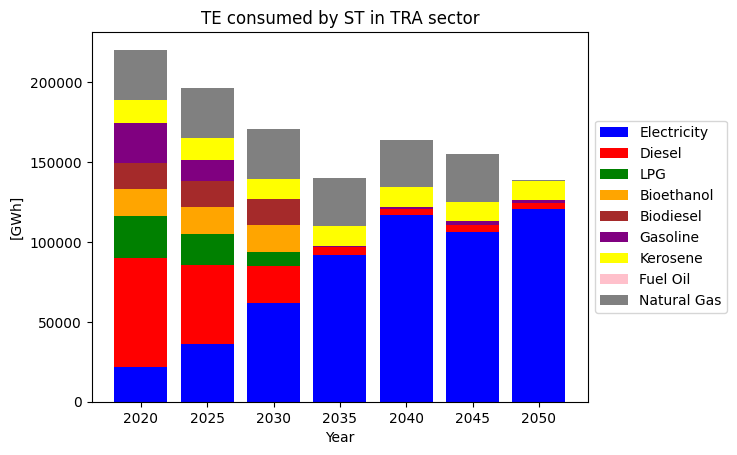

In [13]:
y2020_sTEELE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEELE')) & (d_vars['vQSTInTE'].sYear=='y2020') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2025_sTEELE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEELE')) & (d_vars['vQSTInTE'].sYear=='y2025') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2030_sTEELE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEELE')) & (d_vars['vQSTInTE'].sYear=='y2030') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2035_sTEELE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEELE')) & (d_vars['vQSTInTE'].sYear=='y2035') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2040_sTEELE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEELE')) & (d_vars['vQSTInTE'].sYear=='y2040') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2045_sTEELE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEELE')) & (d_vars['vQSTInTE'].sYear=='y2045') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2050_sTEELE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEELE')) & (d_vars['vQSTInTE'].sYear=='y2050') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()

y2020_sTEOPDIE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (d_vars['vQSTInTE'].sYear=='y2020') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2025_sTEOPDIE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (d_vars['vQSTInTE'].sYear=='y2025') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2030_sTEOPDIE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (d_vars['vQSTInTE'].sYear=='y2030') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2035_sTEOPDIE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (d_vars['vQSTInTE'].sYear=='y2035') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2040_sTEOPDIE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (d_vars['vQSTInTE'].sYear=='y2040') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2045_sTEOPDIE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (d_vars['vQSTInTE'].sYear=='y2045') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2050_sTEOPDIE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPDIE')) & (d_vars['vQSTInTE'].sYear=='y2050') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()

y2020_sTEOLPG_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (d_vars['vQSTInTE'].sYear=='y2020') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2025_sTEOLPG_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (d_vars['vQSTInTE'].sYear=='y2025') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2030_sTEOLPG_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (d_vars['vQSTInTE'].sYear=='y2030') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2035_sTEOLPG_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (d_vars['vQSTInTE'].sYear=='y2035') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2040_sTEOLPG_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (d_vars['vQSTInTE'].sYear=='y2040') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2045_sTEOLPG_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (d_vars['vQSTInTE'].sYear=='y2045') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2050_sTEOLPG_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPLPG')) & (d_vars['vQSTInTE'].sYear=='y2050') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()

y2020_sTEBIOETH_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIOETH')) & (d_vars['vQSTInTE'].sYear=='y2020') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2025_sTEBIOETH_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIOETH')) & (d_vars['vQSTInTE'].sYear=='y2025') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2030_sTEBIOETH_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIOETH')) & (d_vars['vQSTInTE'].sYear=='y2030') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2035_sTEBIOETH_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIOETH')) & (d_vars['vQSTInTE'].sYear=='y2035') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2040_sTEBIOETH_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIOETH')) & (d_vars['vQSTInTE'].sYear=='y2040') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2045_sTEBIOETH_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIOETH')) & (d_vars['vQSTInTE'].sYear=='y2045') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2050_sTEBIOETH_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIOETH')) & (d_vars['vQSTInTE'].sYear=='y2050') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()

y2020_sTEBIODIE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (d_vars['vQSTInTE'].sYear=='y2020') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2025_sTEBIODIE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (d_vars['vQSTInTE'].sYear=='y2025') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2030_sTEBIODIE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (d_vars['vQSTInTE'].sYear=='y2030') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2035_sTEBIODIE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (d_vars['vQSTInTE'].sYear=='y2035') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2040_sTEBIODIE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (d_vars['vQSTInTE'].sYear=='y2040') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2045_sTEBIODIE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (d_vars['vQSTInTE'].sYear=='y2045') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2050_sTEBIODIE_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEBIODIE')) & (d_vars['vQSTInTE'].sYear=='y2050') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()

y2020_sTEOPGSN_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPGSN')) & (d_vars['vQSTInTE'].sYear=='y2020') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2025_sTEOPGSN_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPGSN')) & (d_vars['vQSTInTE'].sYear=='y2025') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2030_sTEOPGSN_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPGSN')) & (d_vars['vQSTInTE'].sYear=='y2030') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2035_sTEOPGSN_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPGSN')) & (d_vars['vQSTInTE'].sYear=='y2035') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2040_sTEOPGSN_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPGSN')) & (d_vars['vQSTInTE'].sYear=='y2040') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2045_sTEOPGSN_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPGSN')) & (d_vars['vQSTInTE'].sYear=='y2045') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2050_sTEOPGSN_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPGSN')) & (d_vars['vQSTInTE'].sYear=='y2050') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()

y2020_sTEOPKER_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (d_vars['vQSTInTE'].sYear=='y2020') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2025_sTEOPKER_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (d_vars['vQSTInTE'].sYear=='y2025') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2030_sTEOPKER_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (d_vars['vQSTInTE'].sYear=='y2030') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2035_sTEOPKER_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (d_vars['vQSTInTE'].sYear=='y2035') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2040_sTEOPKER_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (d_vars['vQSTInTE'].sYear=='y2040') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2045_sTEOPKER_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (d_vars['vQSTInTE'].sYear=='y2045') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2050_sTEOPKER_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPKER')) & (d_vars['vQSTInTE'].sYear=='y2050') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()

y2020_sTEOPFOI_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (d_vars['vQSTInTE'].sYear=='y2020') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2025_sTEOPFOI_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (d_vars['vQSTInTE'].sYear=='y2025') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2030_sTEOPFOI_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (d_vars['vQSTInTE'].sYear=='y2030') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2035_sTEOPFOI_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (d_vars['vQSTInTE'].sYear=='y2035') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2040_sTEOPFOI_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (d_vars['vQSTInTE'].sYear=='y2040') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2045_sTEOPFOI_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (d_vars['vQSTInTE'].sYear=='y2045') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2050_sTEOPFOI_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTEOPFOI')) & (d_vars['vQSTInTE'].sYear=='y2050') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()

y2020_sTENAGAS_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (d_vars['vQSTInTE'].sYear=='y2020') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2025_sTENAGAS_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (d_vars['vQSTInTE'].sYear=='y2025') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2030_sTENAGAS_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (d_vars['vQSTInTE'].sYear=='y2030') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2035_sTENAGAS_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (d_vars['vQSTInTE'].sYear=='y2035') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2040_sTENAGAS_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (d_vars['vQSTInTE'].sYear=='y2040') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2045_sTENAGAS_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (d_vars['vQSTInTE'].sYear=='y2045') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()
y2050_sTENAGAS_TRA = d_vars['vQSTInTE'][(d_vars['vQSTInTE'].sTE.str.startswith('sTENAGAS')) & (d_vars['vQSTInTE'].sYear=='y2050') & (d_vars['vQSTInTE'].sST.str.startswith('sST_DSTRA'))].vQSTInTE.sum()

# Graph bar stackplot
years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
sTEELE_TRA = [y2020_sTEELE_TRA, y2025_sTEELE_TRA, y2030_sTEELE_TRA, y2035_sTEELE_TRA, y2040_sTEELE_TRA, y2045_sTEELE_TRA, y2050_sTEELE_TRA]
sTEOPDIE_TRA = [y2020_sTEOPDIE_TRA, y2025_sTEOPDIE_TRA, y2030_sTEOPDIE_TRA, y2035_sTEOPDIE_TRA, y2040_sTEOPDIE_TRA, y2045_sTEOPDIE_TRA, y2050_sTEOPDIE_TRA]
sTEOLPG_TRA = [y2020_sTEOLPG_TRA, y2025_sTEOLPG_TRA, y2030_sTEOLPG_TRA, y2035_sTEOLPG_TRA, y2040_sTEOLPG_TRA, y2045_sTEOLPG_TRA, y2050_sTEOLPG_TRA]
sTEBIOETH_TRA = [y2020_sTEBIOETH_TRA, y2025_sTEBIOETH_TRA, y2030_sTEBIOETH_TRA, y2035_sTEBIOETH_TRA, y2040_sTEBIOETH_TRA, y2045_sTEBIOETH_TRA, y2050_sTEBIOETH_TRA]
sTEBIODIE_TRA = [y2020_sTEBIODIE_TRA, y2025_sTEBIODIE_TRA, y2030_sTEBIODIE_TRA, y2035_sTEBIODIE_TRA, y2040_sTEBIODIE_TRA, y2045_sTEBIODIE_TRA, y2050_sTEBIODIE_TRA]
sTEOPGSN_TRA = [y2020_sTEOPGSN_TRA, y2025_sTEOPGSN_TRA, y2030_sTEOPGSN_TRA, y2035_sTEOPGSN_TRA, y2040_sTEOPGSN_TRA, y2045_sTEOPGSN_TRA, y2050_sTEOPGSN_TRA]
sTEOPKER_TRA = [y2020_sTEOPKER_TRA, y2025_sTEOPKER_TRA, y2030_sTEOPKER_TRA, y2035_sTEOPKER_TRA, y2040_sTEOPKER_TRA, y2045_sTEOPKER_TRA, y2050_sTEOPKER_TRA]
sTEOPFOI_TRA = [y2020_sTEOPFOI_TRA, y2025_sTEOPFOI_TRA, y2030_sTEOPFOI_TRA, y2035_sTEOPFOI_TRA, y2040_sTEOPFOI_TRA, y2045_sTEOPFOI_TRA, y2050_sTEOPFOI_TRA]
sTENAGAS_TRA = [y2020_sTENAGAS_TRA, y2025_sTENAGAS_TRA, y2030_sTENAGAS_TRA, y2035_sTENAGAS_TRA, y2040_sTENAGAS_TRA, y2045_sTENAGAS_TRA, y2050_sTENAGAS_TRA]

plt.bar(years, sTEELE_TRA, label='Electricity', color='blue')
plt.bar(years, sTEOPDIE_TRA, label='Diesel', color='red', bottom=sTEELE_TRA)
plt.bar(years, sTEOLPG_TRA, label='LPG', color='green', bottom=[sum(x) for x in zip(sTEELE_TRA, sTEOPDIE_TRA)])
plt.bar(years, sTEBIOETH_TRA, label='Bioethanol', color='orange', bottom=[sum(x) for x in zip(sTEELE_TRA, sTEOPDIE_TRA, sTEOLPG_TRA)])
plt.bar(years, sTEBIODIE_TRA, label='Biodiesel', color='brown', bottom=[sum(x) for x in zip(sTEELE_TRA, sTEOPDIE_TRA, sTEOLPG_TRA, sTEBIOETH_TRA)])
plt.bar(years, sTEOPGSN_TRA, label='Gasoline', color='purple', bottom=[sum(x) for x in zip(sTEELE_TRA, sTEOPDIE_TRA, sTEOLPG_TRA, sTEBIOETH_TRA, sTEBIODIE_TRA)])
plt.bar(years, sTEOPKER_TRA, label='Kerosene', color='yellow', bottom=[sum(x) for x in zip(sTEELE_TRA, sTEOPDIE_TRA, sTEOLPG_TRA, sTEBIOETH_TRA, sTEBIODIE_TRA, sTEOPGSN_TRA)])
plt.bar(years, sTEOPFOI_TRA, label='Fuel Oil', color='pink', bottom=[sum(x) for x in zip(sTEELE_TRA, sTEOPDIE_TRA, sTEOLPG_TRA, sTEBIOETH_TRA, sTEBIODIE_TRA, sTEOPGSN_TRA, sTEOPKER_TRA)])
plt.bar(years, sTENAGAS_TRA, label='Natural Gas', color='grey', bottom=[sum(x) for x in zip(sTEELE_TRA, sTEOPDIE_TRA, sTEOLPG_TRA, sTEBIOETH_TRA, sTEBIODIE_TRA, sTEOPGSN_TRA, sTEOPKER_TRA, sTEOPFOI_TRA)])
plt.title('TE consumed by ST in TRA sector')
plt.xlabel('Year')
plt.ylabel('[GWh]')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

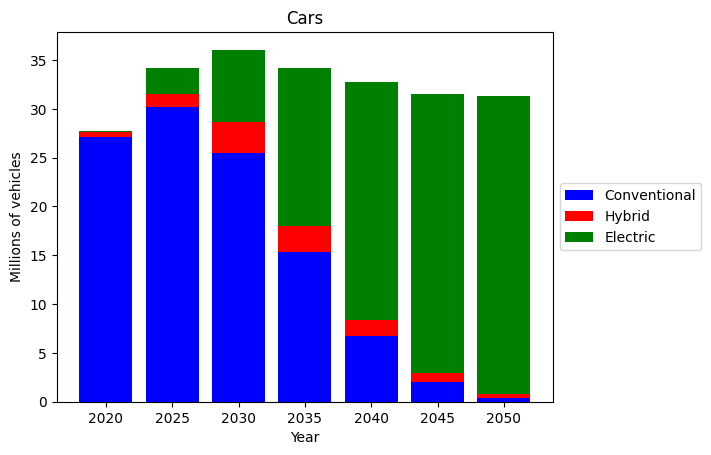

In [14]:
CarGasoline_2020        = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2020') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSN'))].vSTTotCap.sum()
CarDiesel_2020          = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2020') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADST'))].vSTTotCap.sum()
CarCNG_2020             = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2020') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CACNG'))].vSTTotCap.sum()
CarLPG_2020             = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2020') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CALPG'))].vSTTotCap.sum()
CarGasolineHyb_2020     = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2020') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSNPIHYB'))].vSTTotCap.sum()
CarDieselHyb_2020       = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2020') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADIEPIHYB'))].vSTTotCap.sum()
CarElectric_2020        = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2020') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CABEV'))].vSTTotCap.sum()

CarGasoline_2025        = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2025') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSN'))].vSTTotCap.sum()
CarDiesel_2025          = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2025') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADST'))].vSTTotCap.sum()
CarCNG_2025             = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2025') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CACNG'))].vSTTotCap.sum()
CarLPG_2025             = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2025') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CALPG'))].vSTTotCap.sum()
CarGasolineHyb_2025     = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2025') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSNPIHYB'))].vSTTotCap.sum()
CarDieselHyb_2025       = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2025') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADIEPIHYB'))].vSTTotCap.sum()
CarElectric_2025        = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2025') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CABEV'))].vSTTotCap.sum()

CarGasoline_2030        = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2030') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSN'))].vSTTotCap.sum()
CarDiesel_2030          = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2030') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADST'))].vSTTotCap.sum()
CarCNG_2030             = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2030') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CACNG'))].vSTTotCap.sum()
CarLPG_2030             = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2030') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CALPG'))].vSTTotCap.sum()
CarGasolineHyb_2030     = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2030') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSNPIHYB'))].vSTTotCap.sum()
CarDieselHyb_2030       = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2030') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADIEPIHYB'))].vSTTotCap.sum()
CarElectric_2030        = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2030') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CABEV'))].vSTTotCap.sum()

CarGasoline_2035        = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2035') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSN'))].vSTTotCap.sum()
CarDiesel_2035          = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2035') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADST'))].vSTTotCap.sum()
CarCNG_2035             = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2035') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CACNG'))].vSTTotCap.sum()
CarLPG_2035             = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2035') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CALPG'))].vSTTotCap.sum()
CarGasolineHyb_2035     = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2035') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSNPIHYB'))].vSTTotCap.sum()
CarDieselHyb_2035       = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2035') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADIEPIHYB'))].vSTTotCap.sum()
CarElectric_2035        = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2035') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CABEV'))].vSTTotCap.sum()

CarGasoline_2040        = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2040') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSN'))].vSTTotCap.sum()
CarDiesel_2040          = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2040') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADST'))].vSTTotCap.sum()
CarCNG_2040             = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2040') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CACNG'))].vSTTotCap.sum()
CarLPG_2040             = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2040') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CALPG'))].vSTTotCap.sum()
CarGasolineHyb_2040     = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2040') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSNPIHYB'))].vSTTotCap.sum()
CarDieselHyb_2040       = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2040') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADIEPIHYB'))].vSTTotCap.sum()
CarElectric_2040        = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2040') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CABEV'))].vSTTotCap.sum()

CarGasoline_2045        = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2045') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSN'))].vSTTotCap.sum()
CarDiesel_2045          = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2045') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADST'))].vSTTotCap.sum()
CarCNG_2045             = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2045') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CACNG'))].vSTTotCap.sum()
CarLPG_2045             = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2045') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CALPG'))].vSTTotCap.sum()
CarGasolineHyb_2045     = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2045') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSNPIHYB'))].vSTTotCap.sum()
CarDieselHyb_2045       = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2045') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADIEPIHYB'))].vSTTotCap.sum()
CarElectric_2045        = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2045') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CABEV'))].vSTTotCap.sum()

CarGasoline_2050        = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2050') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSN'))].vSTTotCap.sum()
CarDiesel_2050          = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2050') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADST'))].vSTTotCap.sum()
CarCNG_2050             = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2050') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CACNG'))].vSTTotCap.sum()
CarLPG_2050             = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2050') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CALPG'))].vSTTotCap.sum()
CarGasolineHyb_2050     = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2050') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CAGSNPIHYB'))].vSTTotCap.sum()
CarDieselHyb_2050       = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2050') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CADIEPIHYB'))].vSTTotCap.sum()
CarElectric_2050        = d_vars['vSTTotCap'][(d_vars['vSTTotCap'].sYear=='y2050') & (d_vars['vSTTotCap'].sST.str.startswith('sST_DSTRA_LNP_CABEV'))].vSTTotCap.sum()

# Graph bar stackplot
years = ['2020', '2025', '2030', '2035', '2040', '2045', '2050']
Car_Conventional = [CarGasoline_2020 + CarDiesel_2020 + CarCNG_2020 + CarLPG_2020, CarGasoline_2025 + CarDiesel_2025 + CarCNG_2025 + CarLPG_2025, CarGasoline_2030 + CarDiesel_2030 + CarCNG_2030 + CarLPG_2030, CarGasoline_2035 + CarDiesel_2035 + CarCNG_2035 + CarLPG_2035, CarGasoline_2040 + CarDiesel_2040 + CarCNG_2040 + CarLPG_2040, CarGasoline_2045 + CarDiesel_2045 + CarCNG_2045 + CarLPG_2045, CarGasoline_2050 + CarDiesel_2050 + CarCNG_2050 + CarLPG_2050]
Car_Hybrid = [CarGasolineHyb_2020 + CarDieselHyb_2020, CarGasolineHyb_2025 + CarDieselHyb_2025, CarGasolineHyb_2030 + CarDieselHyb_2030, CarGasolineHyb_2035 + CarDieselHyb_2035, CarGasolineHyb_2040 + CarDieselHyb_2040, CarGasolineHyb_2045 + CarDieselHyb_2045, CarGasolineHyb_2050 + CarDieselHyb_2050]
Car_Electric = [CarElectric_2020, CarElectric_2025, CarElectric_2030, CarElectric_2035, CarElectric_2040, CarElectric_2045, CarElectric_2050]

plt.bar(years, Car_Conventional, label='Conventional', color='blue')
plt.bar(years, Car_Hybrid, label='Hybrid', color='red', bottom=Car_Conventional)
plt.bar(years, Car_Electric, label='Electric', color='green', bottom=[sum(x) for x in zip(Car_Conventional, Car_Hybrid)])
plt.title('Cars')
plt.xlabel('Year')
plt.ylabel('Millions of vehicles')
plt.legend()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))